In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

In [2]:
dataset = sns.load_dataset('iris')
dataset_size = dataset.shape
features_count = dataset.shape[1] - 1
features = dataset.columns[:-1].tolist()
classes_count = dataset['species'].value_counts()
non_type_percent = dataset.isnull().mean() * 100
other = dataset.describe()

print(f'1. Размерность всего датасета: {dataset_size}')
print(f'2. Количество признаков: {features_count}')
print(f'Признаки: {features}')
print(f'3. Количество целевых классов и объектов в каждом из классов:\n{classes_count}')
print(f'4. Процент объектов с неопределенными признаками:\n{non_type_percent}')
print(f'5. Иные ключевые характеристики датасета:\n{other}')

1. Размерность всего датасета: (150, 5)
2. Количество признаков: 4
Признаки: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
3. Количество целевых классов и объектов в каждом из классов:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
4. Процент объектов с неопределенными признаками:
sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64
5. Иные ключевые характеристики датасета:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.

1. Используя make_blobs с любым random_state, сгенерировать датасет df1, в
котором есть три класса с размером каждого класса 1000 и четыре
количественных (недискретных) признака.
+ ключевые характеристики датасета

In [3]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

X, y = make_blobs(n_samples=3000, centers=3, n_features=4, random_state=42)

df1 = pd.DataFrame(X, columns=features)
df1['species'] = y
# 2 - setosa
# 1 - versicolor
# 0 - virginica

dataset_size = df1.shape
features_count = df1.shape[1] - 1
classes_count = df1['species'].value_counts()
non_type_percent = df1.isnull().mean() * 100
other = df1.describe()

print(f'1. Размерность всего датасета: {dataset_size}')
print(f'2. Количество признаков: {features_count}')
print(f'3. Количество целевых классов и объектов в каждом из классов:\n{classes_count}')
print(f'4. Процент объектов с неопределенными признаками:\n{non_type_percent}')
print(f'5. Иные ключевые характеристики датасета:\n{other}')

1. Размерность всего датасета: (3000, 5)
2. Количество признаков: 4
3. Количество целевых классов и объектов в каждом из классов:
species
2    1000
1    1000
0    1000
Name: count, dtype: int64
4. Процент объектов с неопределенными признаками:
sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64
5. Иные ключевые характеристики датасета:
       sepal_length  sepal_width  petal_length  petal_width      species
count   3000.000000  3000.000000   3000.000000  3000.000000  3000.000000
mean      -2.438740     2.079648     -4.626291     6.238737     1.000000
std        3.758897     6.764158      6.627150     3.275081     0.816633
min      -10.100644   -10.481195    -13.510710    -1.017966     0.000000
25%       -6.131012    -6.272828     -9.604578     2.665286     0.000000
50%       -2.455206     4.128959     -8.561488     7.300362     1.000000
75%        1.364304     8.337166      3.957308     8.924860     2.000000
max        5.39

2. Визуализация на всех парах переменных

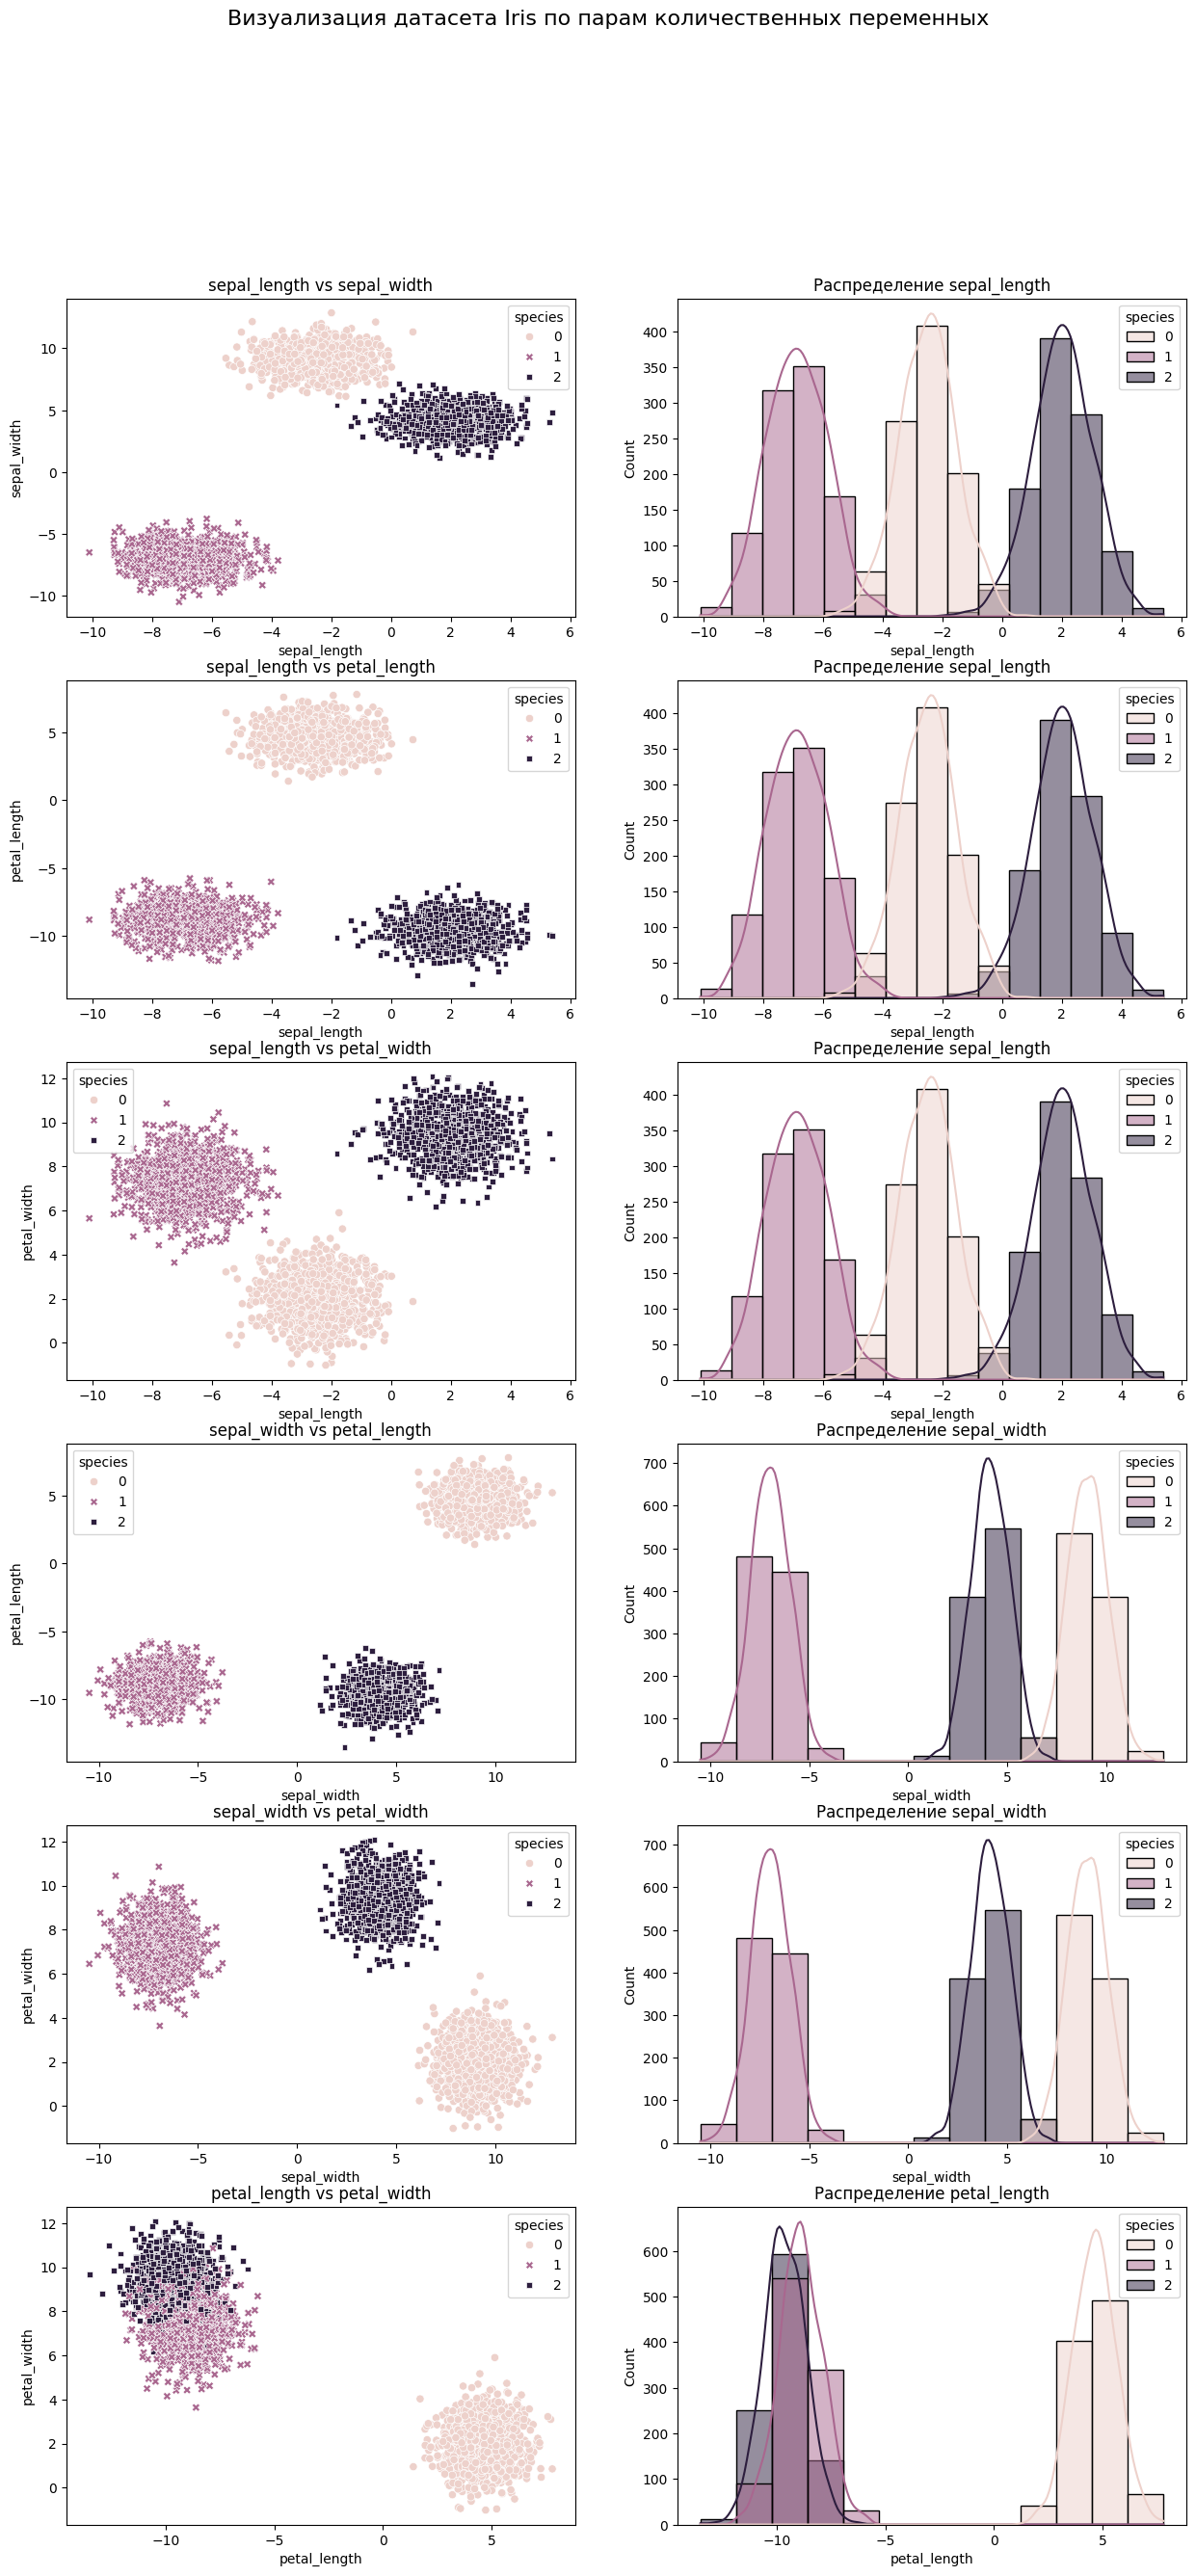

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

pairs_of_qu = [(features[i], features[j]) for i in range (len(features)) for j in range(i+1, len(features))]

fig, axes = plt.subplots(len(pairs_of_qu), 2, figsize=(15, 30))
fig.suptitle('Визуализация датасета Iris по парам количественных переменных', fontsize=16)

for idx, (x_pair, y_pair) in enumerate(pairs_of_qu):
    ax1 = axes[idx, 0]
    sns.scatterplot(data=df1, x=x_pair, y=y_pair, hue='species', style='species', ax=ax1)
    ax1.set_title(f'{x_pair} vs {y_pair}')

    ax2 = axes[idx, 1]
    sns.histplot(data=df1, x=x_pair, hue='species', kde=True, ax=ax2)
    ax2.set_title(f'Распределение {x_pair}')

Корреляция

Корреляционная матрица для всего датасета:


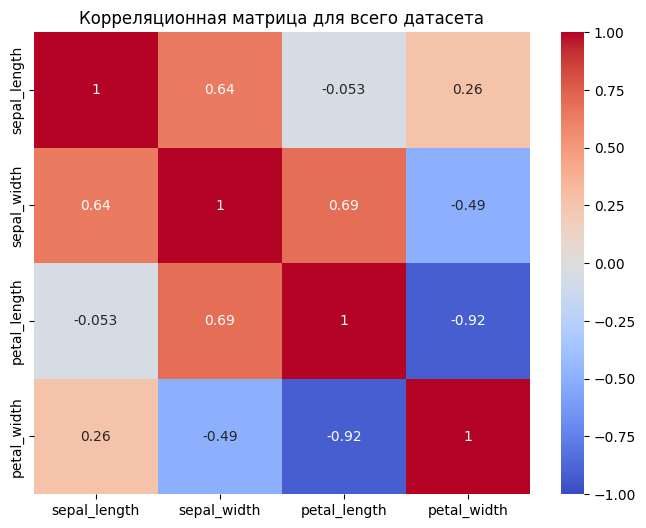

In [5]:
correlation_matrix_all = df1[features].corr(method='pearson')
print("Корреляционная матрица для всего датасета:")
# print(correlation_matrix_all)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица для всего датасета')
plt.show()

Коэффициент корреляции Пирсона для класса '2':



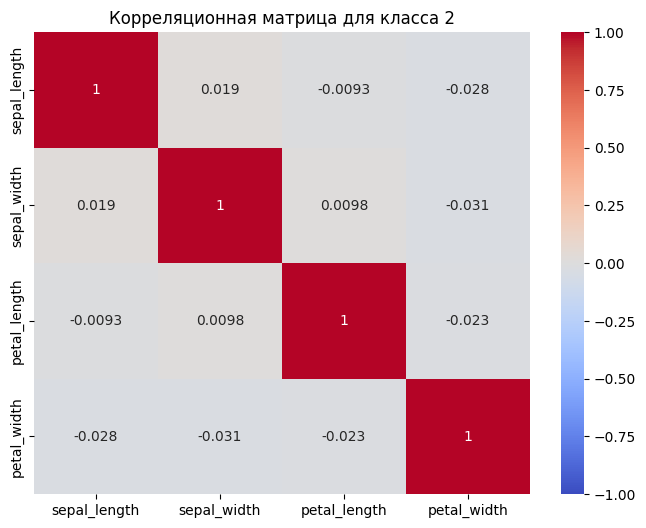

Коэффициент корреляции Пирсона для класса '1':



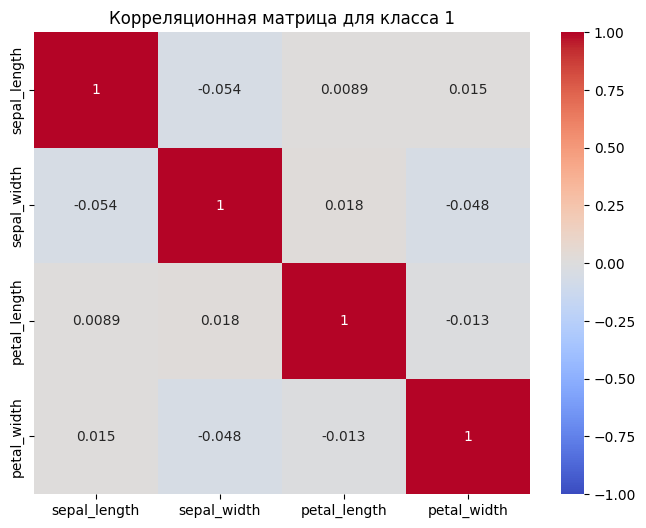

Коэффициент корреляции Пирсона для класса '0':



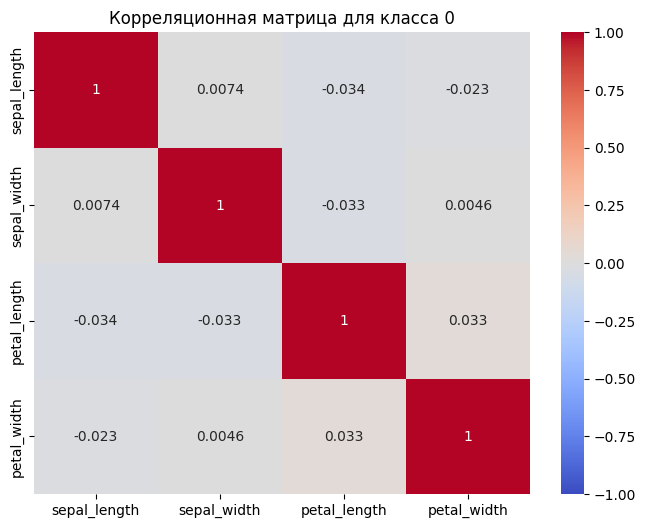

In [6]:
classes = df1['species'].unique()

for c in classes:
    subset = df1[df1['species'] == c]
    correlation_matrix_class = subset[features].corr(method='pearson')
    print(f"Коэффициент корреляции Пирсона для класса '{c}':")
    print(correlation_matrix_class.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))
    print()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix_class, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Корреляционная матрица для класса {c}')
    plt.show()

3. На основе созданного в пункте [1] датасета сгенерировать отдельные
дополнительные датасеты (df2, df5, df10…), в которых объекты одного класса
повторены 2 раза, 5 раз, 10 раз, 20 раз, 50 раз, 100 раз, 1000 раз, 10k раз, а
количество объектов в остальных классов неизменно.

In [7]:
def create_duplicated_datasets(df, class_label, repetition_factors):

    datasets = {}
    class_data = df[df['species'] == class_label]
    other_data = df[df['species'] != class_label]

    for factor in repetition_factors:
        repeated_class_data = pd.concat([class_data] * factor, ignore_index=True)
        new_dataset = pd.concat([other_data, repeated_class_data], ignore_index=True)
        datasets[f'df{factor}'] = new_dataset

    return datasets

repetition_factors = [2, 5, 10, 20, 50, 100, 1000, 10000]
class_to_duplicate = 0
duplicated_datasets = create_duplicated_datasets(df1, class_to_duplicate, repetition_factors)

for key, dataset in duplicated_datasets.items():
    print(f"Размерность {key}: {dataset.shape}")


Размерность df2: (4000, 5)
Размерность df5: (7000, 5)
Размерность df10: (12000, 5)
Размерность df20: (22000, 5)
Размерность df50: (52000, 5)
Размерность df100: (102000, 5)
Размерность df1000: (1002000, 5)
Размерность df10000: (10002000, 5)


4. Выбрать пару классов (включая класс с повторенными объектами) и пару количественных признаков.
Используя метод **LDA** (линейный дискриминантный анализ), для каждого из датасетов df1, df2, df5, df10, df20, df50, df100, df1000, df10k, построить решающую функцию алгоритма, разграниченные решающей функцией зоны и отдельные объекты классов.

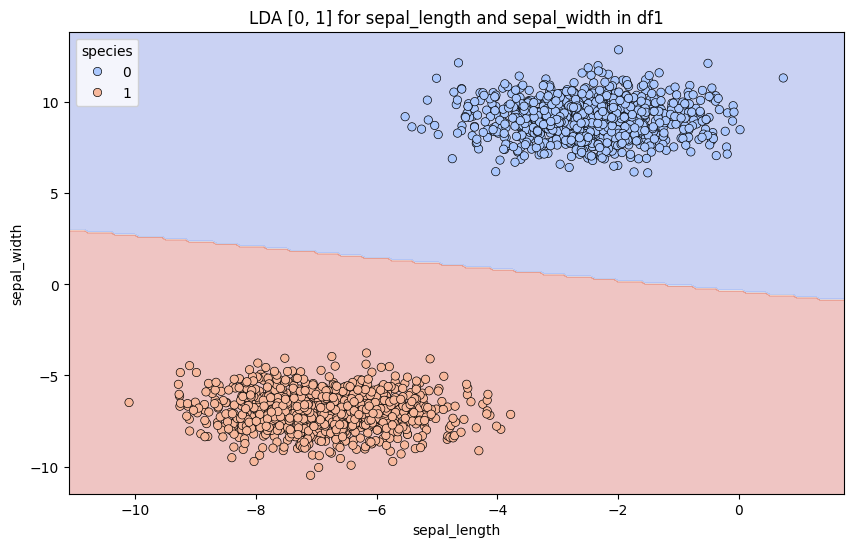

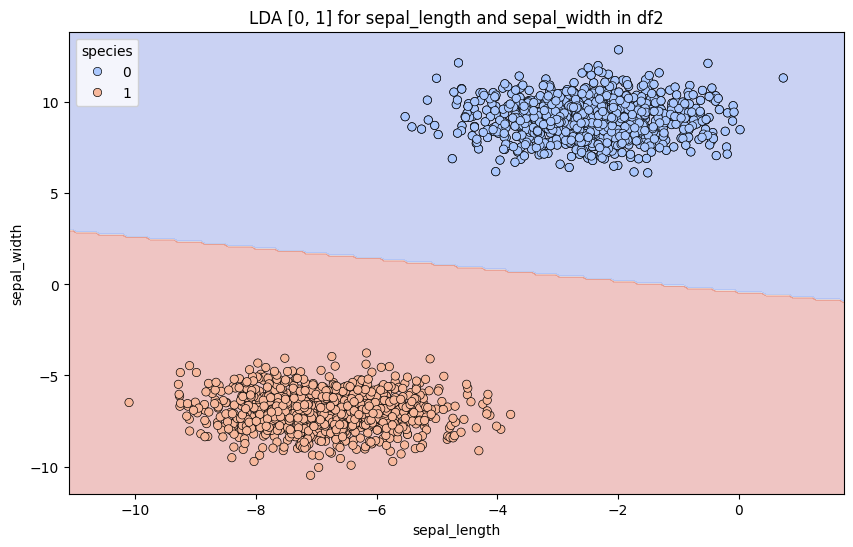

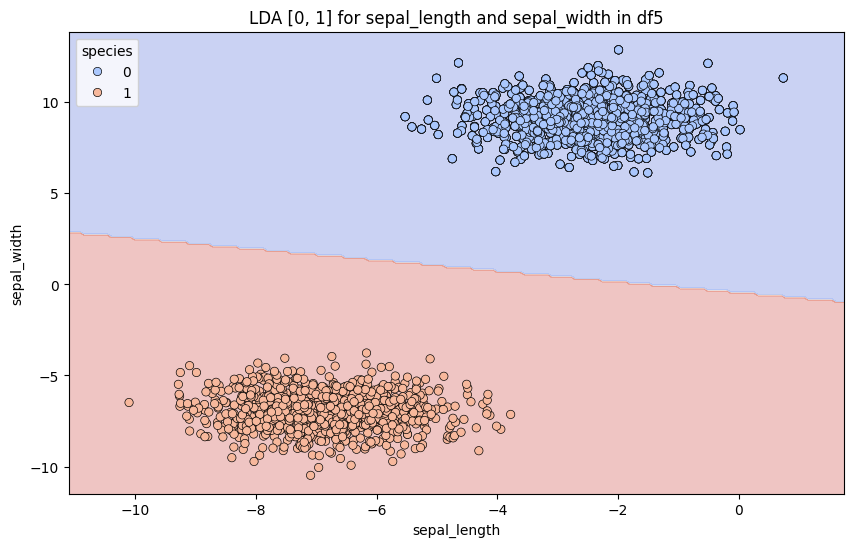

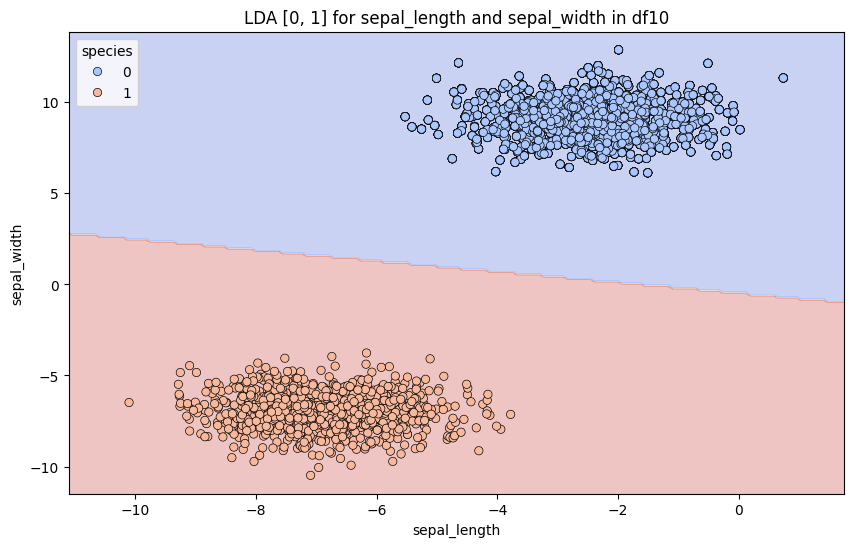

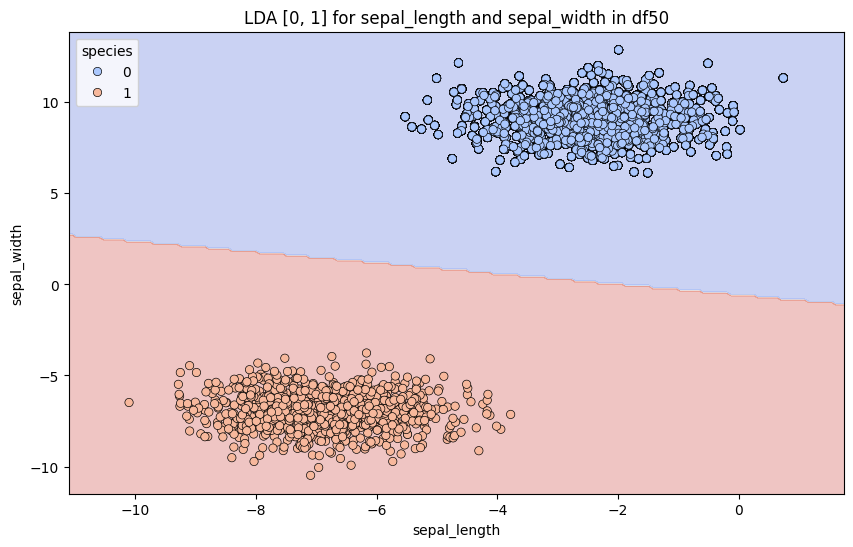

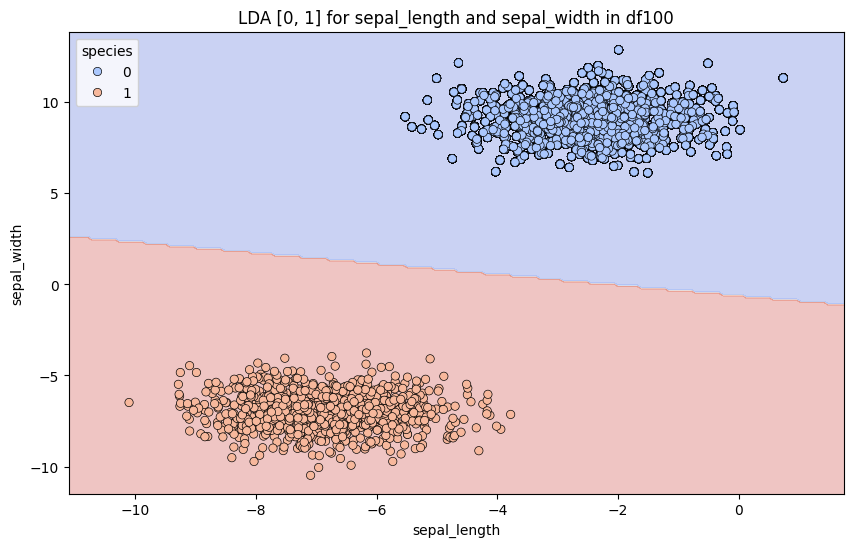

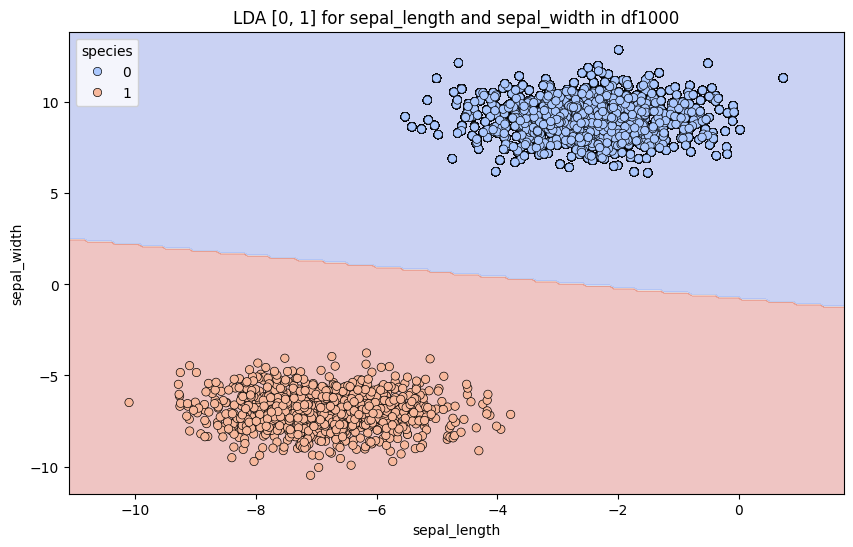

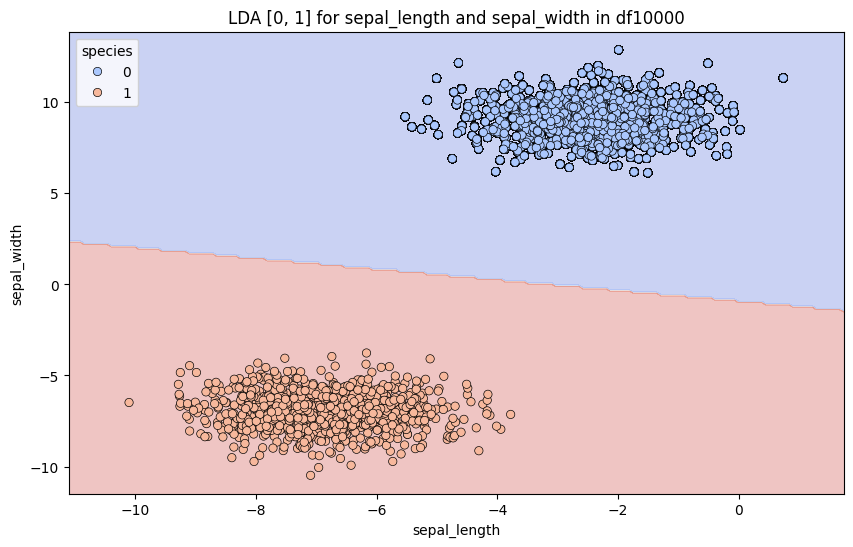

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

def plot_lda_decision_boundaries(df, class_labels, x_var, y_var, name):

    features = [x_var, y_var]
    filtered_df = df[df['species'].isin(class_labels)]

    X = filtered_df[features].values
    y = filtered_df['species'].values
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=features[0], y=features[1], hue="species", data=filtered_df, palette='coolwarm', edgecolor='k')
    plt.title(f'LDA {class_labels} для {x_var} и {y_var} в {name}')
    plt.show()

plot_lda_decision_boundaries(df1, [0, 1], 'sepal_length', 'sepal_width', 'df1')
plot_lda_decision_boundaries(duplicated_datasets['df2'], [0, 1], 'sepal_length', 'sepal_width', 'df2')
plot_lda_decision_boundaries(duplicated_datasets['df5'], [0, 1], 'sepal_length', 'sepal_width', 'df5')
plot_lda_decision_boundaries(duplicated_datasets['df10'], [0, 1], 'sepal_length', 'sepal_width', 'df10')
plot_lda_decision_boundaries(duplicated_datasets['df50'], [0, 1], 'sepal_length', 'sepal_width', 'df50')
plot_lda_decision_boundaries(duplicated_datasets['df100'], [0, 1], 'sepal_length', 'sepal_width', 'df100')
plot_lda_decision_boundaries(duplicated_datasets['df1000'], [0, 1], 'sepal_length', 'sepal_width', 'df1000')
plot_lda_decision_boundaries(duplicated_datasets['df10000'], [0, 1], 'sepal_length', 'sepal_width', 'df10000')

5. Выбрать пару классов (включая класс с повторенными объектами) и пару количественных признаков.
Используя метод **SVM** (линейный дискриминантный анализ), для каждого из датасетов df1, df2, df5, df10, df20, df50, df100, df1000, df10k, построить решающую функцию алгоритма, разграниченные решающей функцией зоны и отдельные объекты классов.

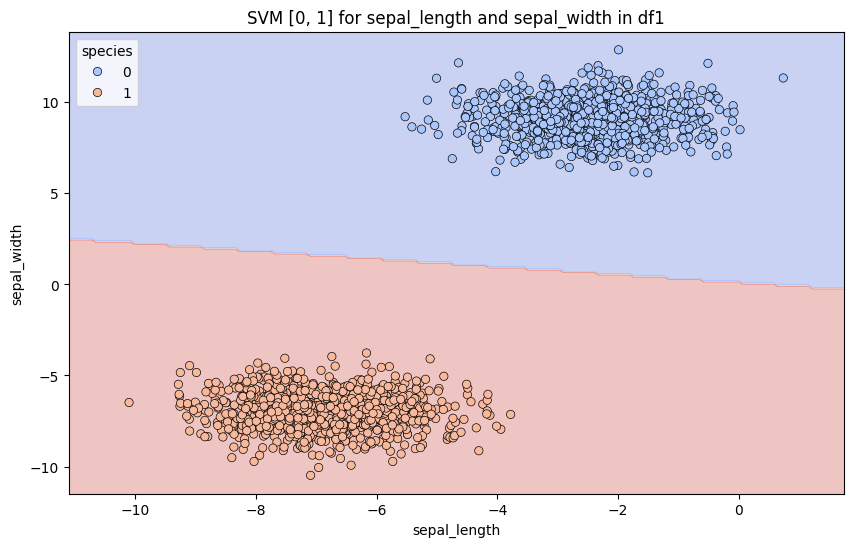

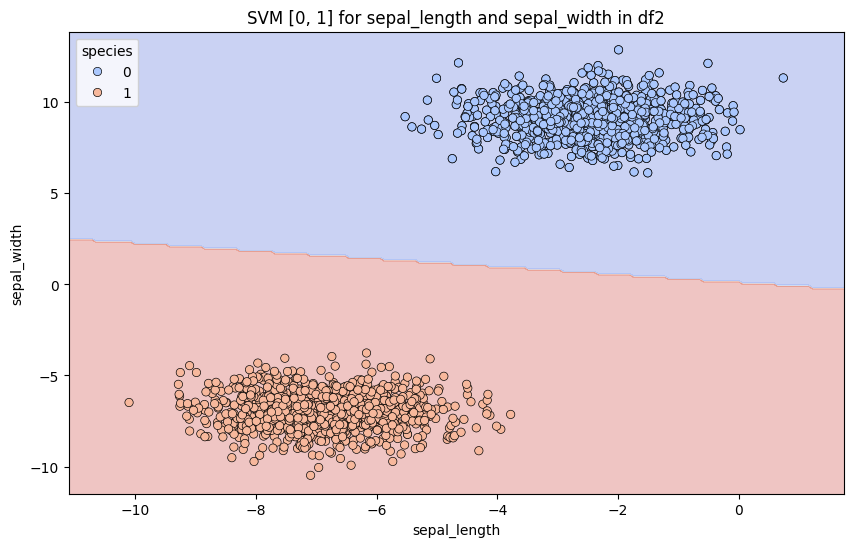

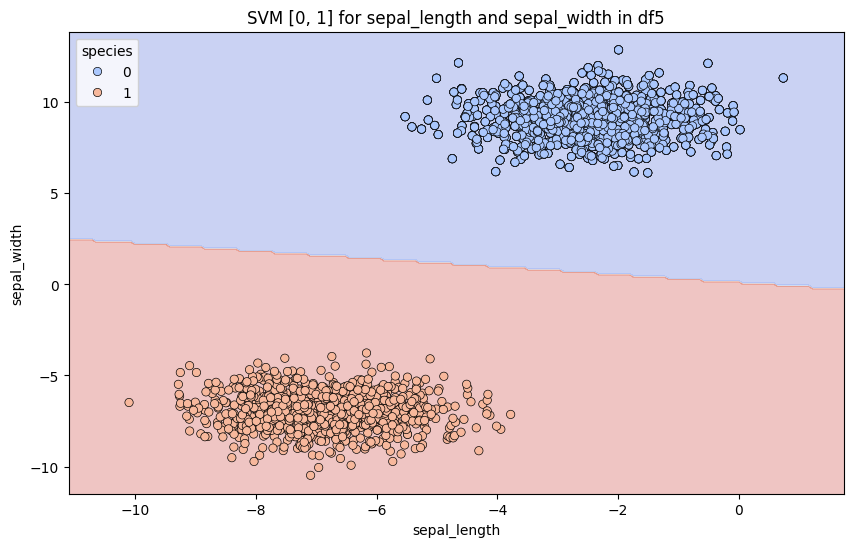

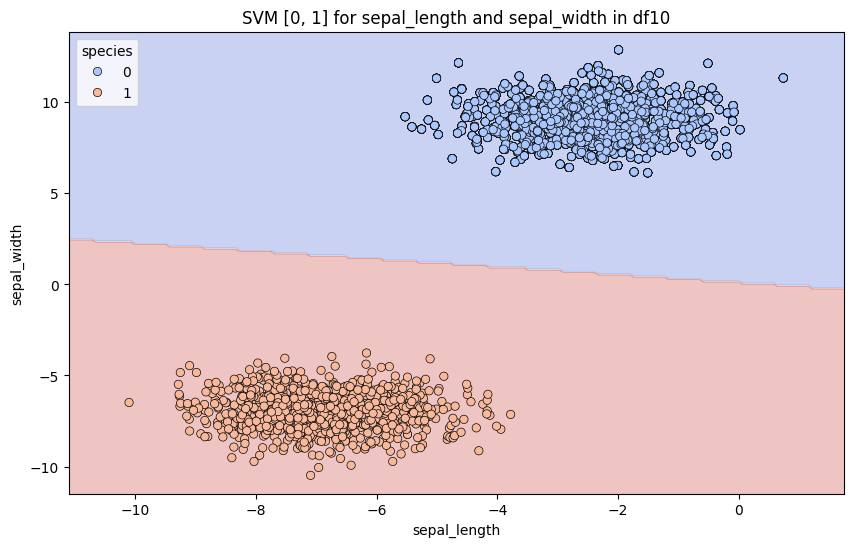

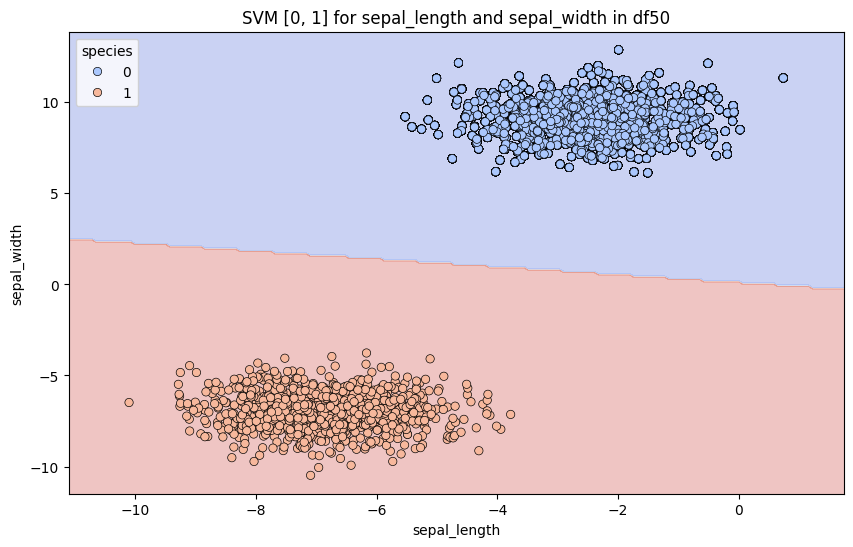

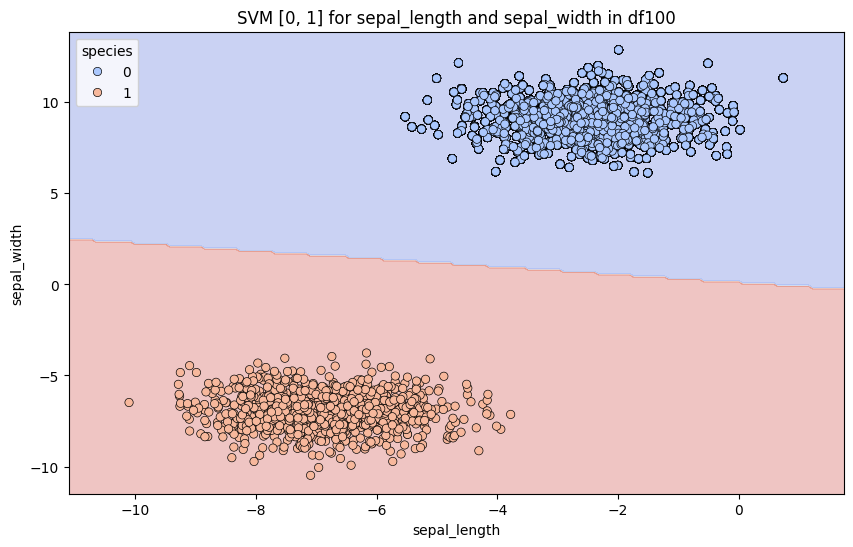

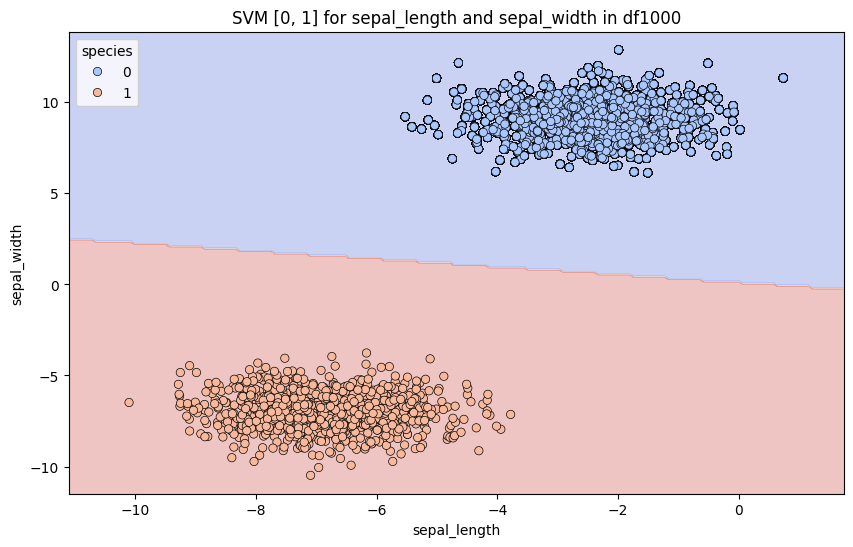

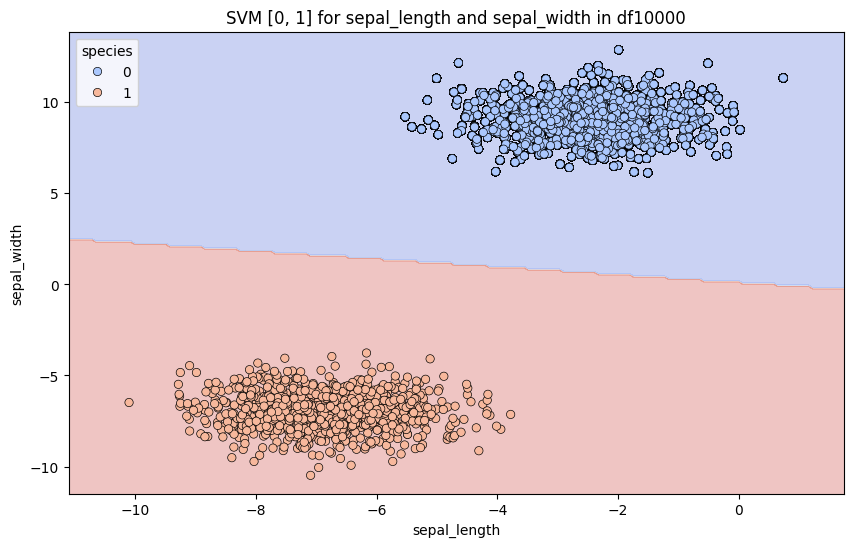

In [9]:
from sklearn.svm import SVC

def plot_svm_decision_boundaries(df, class_labels, x_var, y_var, name, kernel='linear'):

    features = [x_var, y_var]
    filtered_df = df[df['species'].isin(class_labels)]

    X = filtered_df[features].values
    y = filtered_df['species'].values
    svm = SVC(kernel=kernel)
    svm.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=features[0], y=features[1], hue="species", data=filtered_df, palette='coolwarm', edgecolor='k')
    plt.title(f'SVM {class_labels} для {x_var} и {y_var} в {name}')
    plt.show()

plot_svm_decision_boundaries(df1, [0, 1], 'sepal_length', 'sepal_width', 'df1')
plot_svm_decision_boundaries(duplicated_datasets['df2'], [0, 1], 'sepal_length', 'sepal_width', 'df2')
plot_svm_decision_boundaries(duplicated_datasets['df5'], [0, 1], 'sepal_length', 'sepal_width', 'df5')
plot_svm_decision_boundaries(duplicated_datasets['df10'], [0, 1], 'sepal_length', 'sepal_width', 'df10')
plot_svm_decision_boundaries(duplicated_datasets['df50'], [0, 1], 'sepal_length', 'sepal_width', 'df50')
plot_svm_decision_boundaries(duplicated_datasets['df100'], [0, 1], 'sepal_length', 'sepal_width', 'df100')
plot_svm_decision_boundaries(duplicated_datasets['df1000'], [0, 1], 'sepal_length', 'sepal_width', 'df1000')
plot_svm_decision_boundaries(duplicated_datasets['df10000'], [0, 1], 'sepal_length', 'sepal_width', 'df10000')

6. Для каждого из датасетов df1, df2, df5, df10, df20, df50, df100, df1000, df10k из пункта 4 восстановить в таблицу координаты следующих точек:
- центр отрезка, соединяющего центры масс выбранных классов
- общий центр масс выбранных классов
- точку пересечения решающей функции и отрезка, соединяющего центры масс
выбранных классов.

В виде графиков визуализировать зависимости между количеством повторов в классе с повторенными объектами и координатами найденных точек

In [10]:
def find_points_with_lda(df, class_labels, x_var, y_var, name):

    features = [x_var, y_var]

    filtered_df = df[df['species'].isin(class_labels)]

    X = filtered_df[features].values
    y = filtered_df['species'].values

    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)

    centers = filtered_df.groupby('species')[features].mean()

    segment_center = centers.mean().values

    global_center = filtered_df[features].mean().values

    # Вычисление точки пересечения решающей функции с отрезком
    # Получение коэффициентов для решающей функции
    coef = lda.coef_[0]
    intercept = lda.intercept_[0]

    # Формула: coef[0] * x + coef[1] * y + intercept = 0
    # Используем уравнение отрезка между центрами масс: y = k * x + b
    x1, y1 = centers.iloc[0]
    x2, y2 = centers.iloc[1]
    k = (y2 - y1) / (x2 - x1)
    b = y1 - k * x1

    # Подставляем в уравнение решающей функции и решаем для x
    # coef[0] * x + coef[1] * (k * x + b) + intercept = 0
    a = coef[0] + coef[1] * k
    c = coef[1] * b + intercept
    x_intersection = -c / a
    y_intersection = k * x_intersection + b

    intersection_point = (x_intersection, y_intersection)

    print(f"Центры масс классов {class_labels} в {name}:")
    print(centers)
    print(f"Центр отрезка, соединяющего центры масс: {segment_center}")
    print(f"Общий центр масс: {global_center}")
    print(f"Точка пересечения решающей функции с отрезком: {intersection_point}")

    return centers, segment_center, global_center, intersection_point

centers_1, segment_center_1, global_center_1, intersection_point_1 = find_points_with_lda(df1, [0, 1], 'sepal_length', 'sepal_width', 'df1')
centers_2, segment_center_2, global_center_2, intersection_point_2 = find_points_with_lda(duplicated_datasets['df2'], [0, 1], 'sepal_length', 'sepal_width', 'df2')
centers_5, segment_center_5, global_center_5, intersection_point_5 = find_points_with_lda(duplicated_datasets['df5'], [0, 1], 'sepal_length', 'sepal_width', 'df5')
centers_10, segment_center_10, global_center_10, intersection_point_10 = find_points_with_lda(duplicated_datasets['df10'], [0, 1], 'sepal_length', 'sepal_width', 'df10')
centers_50, segment_center_50, global_center_50, intersection_point_50 = find_points_with_lda(duplicated_datasets['df50'], [0, 1], 'sepal_length', 'sepal_width', 'df50')
centers_100, segment_center_100, global_center_100, intersection_point_100 = find_points_with_lda(duplicated_datasets['df100'], [0, 1], 'sepal_length', 'sepal_width', 'df100')
centers_1000, segment_center_1000, global_center_1000, intersection_point_1000 = find_points_with_lda(duplicated_datasets['df1000'], [0, 1], 'sepal_length', 'sepal_width', 'df1000')
centers_10000, segment_center_10000, global_center_10000, intersection_point_10000 = find_points_with_lda(duplicated_datasets['df10000'], [0, 1], 'sepal_length', 'sepal_width', 'df10000')


Центры масс классов [0, 1] в df1:
         sepal_length  sepal_width
species                           
0           -2.481067     9.040048
1           -6.853654    -6.949176
Центр отрезка, соединяющего центры масс: [-4.6673604   1.04543626]
Общий центр масс: [-4.6673604   1.04543626]
Точка пересечения решающей функции с отрезком: (-4.667360401962669, 1.0454362576576628)
Центры масс классов [0, 1] в df2:
         sepal_length  sepal_width
species                           
0           -2.481067     9.040048
1           -6.853654    -6.949176
Центр отрезка, соединяющего центры масс: [-4.6673604   1.04543626]
Общий центр масс: [-3.93859581  3.71030696]
Точка пересечения решающей функции с отрезком: (-4.678460849662495, 1.0048452929389775)
Центры масс классов [0, 1] в df5:
         sepal_length  sepal_width
species                           
0           -2.481067     9.040048
1           -6.853654    -6.949176
Центр отрезка, соединяющего центры масс: [-4.6673604   1.04543626]
Общий центр м

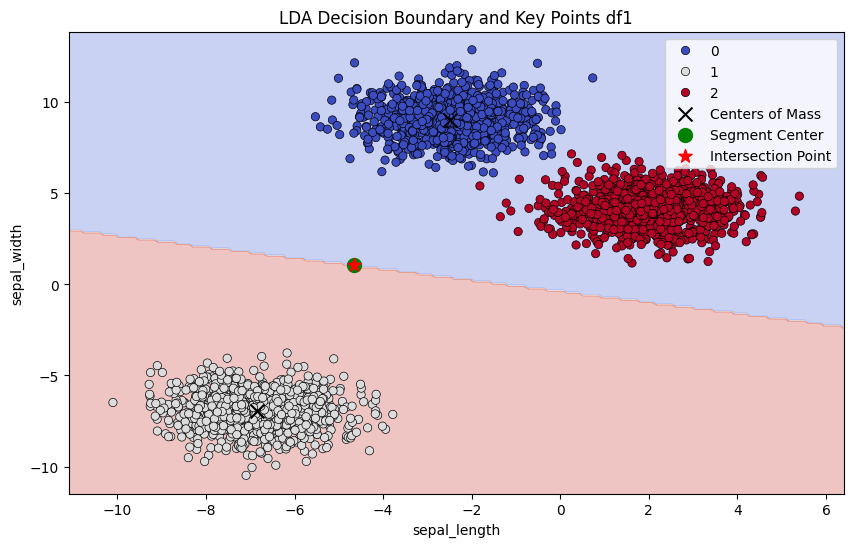

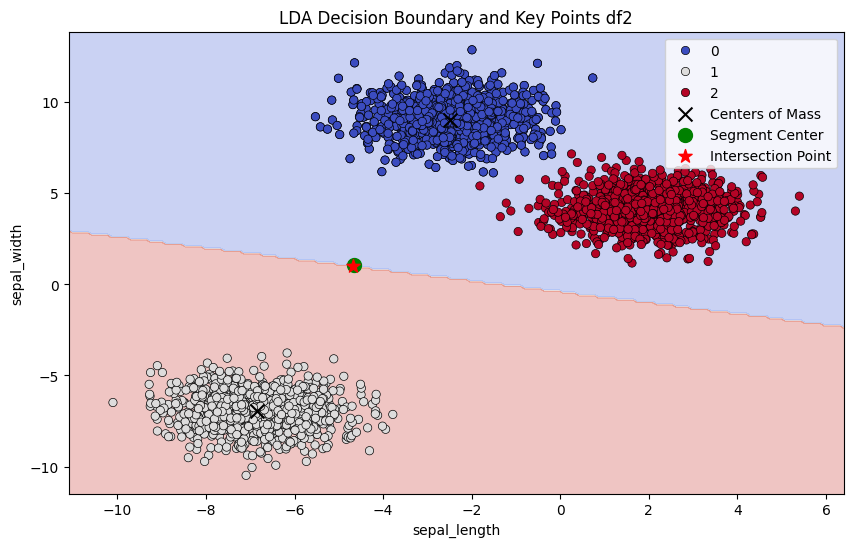

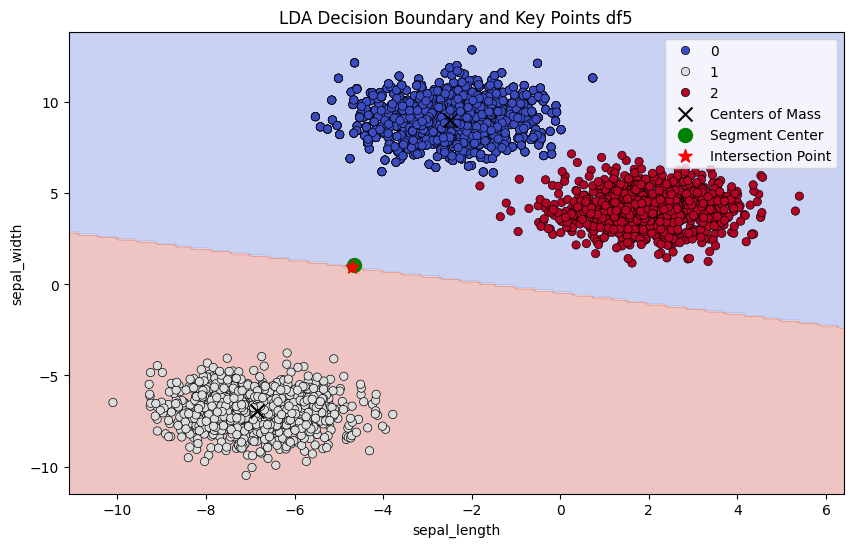

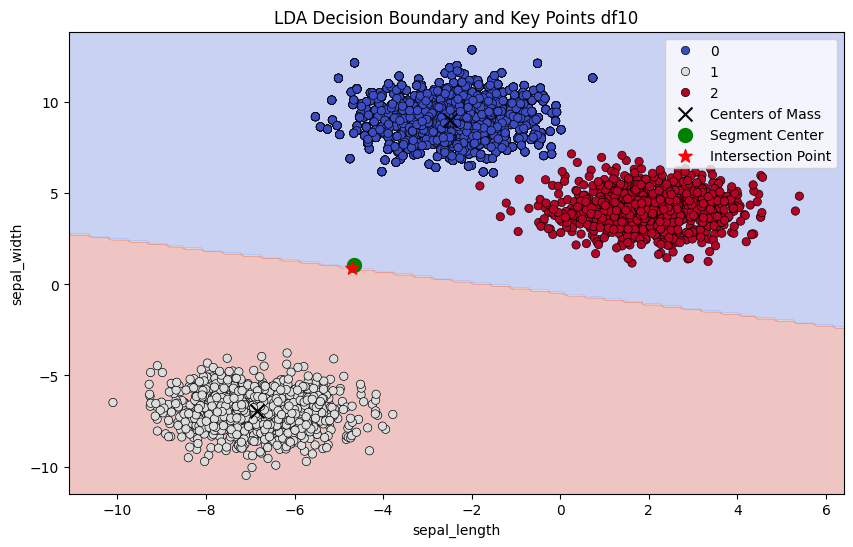

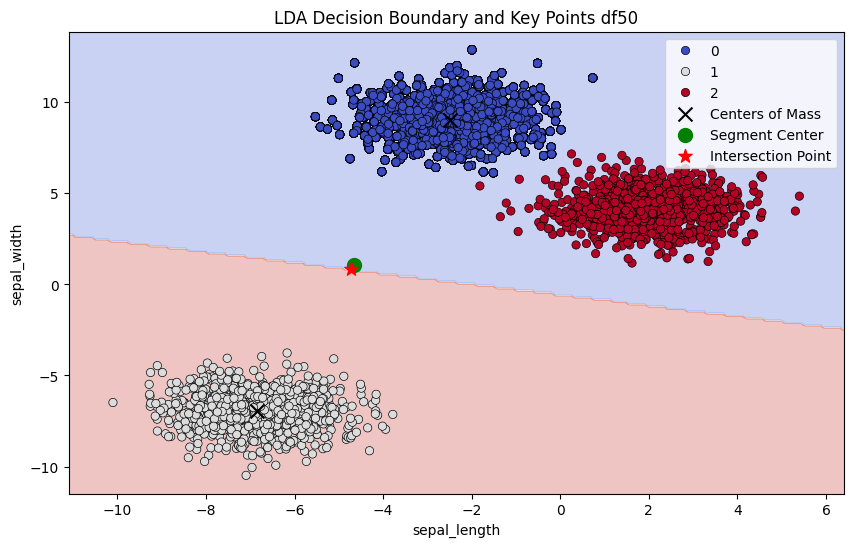

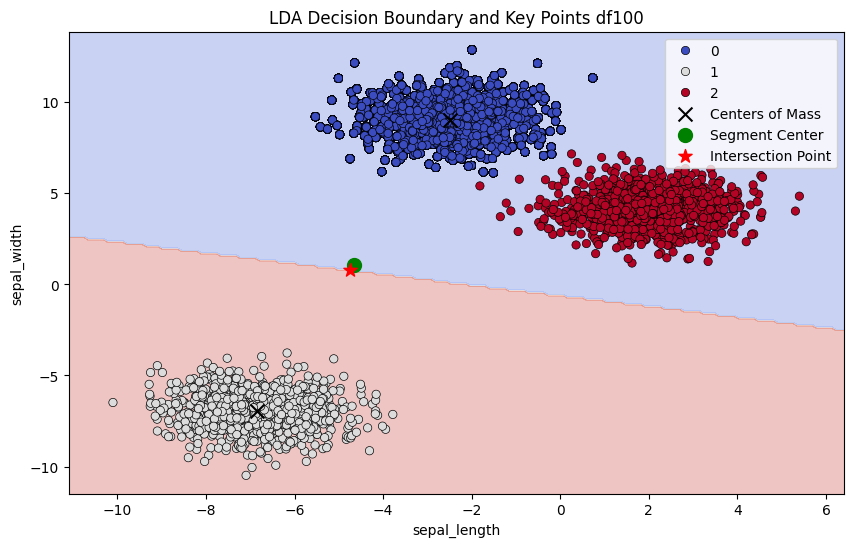

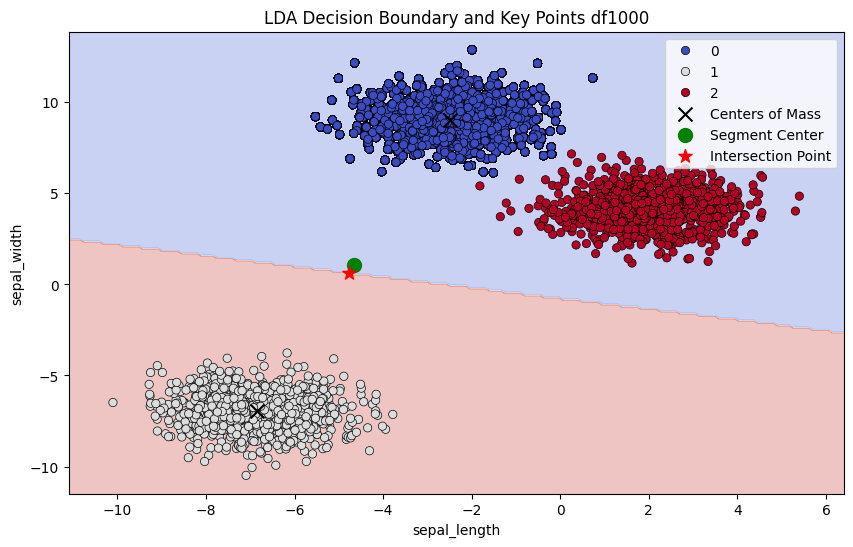

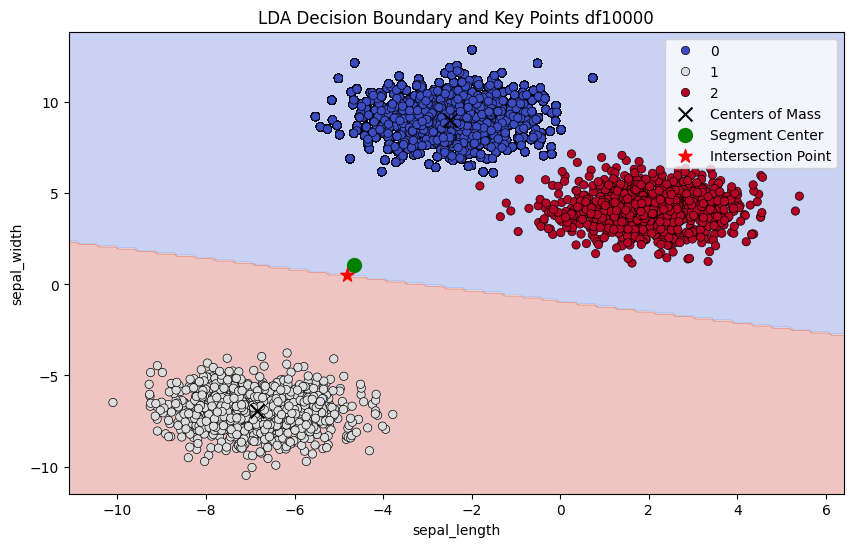

In [11]:
def plot_points_and_decision_boundary(df, class_labels, x_var, y_var, lda, centers, segment_center, intersection_point, name):

    features = [x_var, y_var]
    filtered_df = df[df['species'].isin(class_labels)]

    X = filtered_df[features].values
    y = filtered_df['species'].values

    lda.fit(X, y)
    x_min, x_max = df[features[0]].min() - 1, df[features[0]].max() + 1
    y_min, y_max = df[features[1]].min() - 1, df[features[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=features[0], y=features[1], hue="species", data=df, palette='coolwarm', edgecolor='k')

    plt.scatter(centers[features[0]], centers[features[1]], c='black', marker='x', s=100, label='Centers of Mass')
    plt.scatter(segment_center[0], segment_center[1], c='green', marker='o', s=100, label='Segment Center')
    plt.scatter(intersection_point[0], intersection_point[1], c='red', marker='*', s=100, label='Intersection Point')

    plt.title(f'LDA Decision Boundary and Key Points {name}')
    plt.legend()
    plt.show()

plot_points_and_decision_boundary(df1, [0, 1], 'sepal_length', 'sepal_width', LinearDiscriminantAnalysis(), centers_1, segment_center_1, intersection_point_1, 'df1')
plot_points_and_decision_boundary(duplicated_datasets['df2'], [0, 1], 'sepal_length', 'sepal_width', LinearDiscriminantAnalysis(), centers_2, segment_center_2, intersection_point_2, 'df2')
plot_points_and_decision_boundary(duplicated_datasets['df5'], [0, 1], 'sepal_length', 'sepal_width', LinearDiscriminantAnalysis(), centers_5, segment_center_5, intersection_point_5, 'df5')
plot_points_and_decision_boundary(duplicated_datasets['df10'], [0, 1], 'sepal_length', 'sepal_width', LinearDiscriminantAnalysis(), centers_10, segment_center_10, intersection_point_10, 'df10')
plot_points_and_decision_boundary(duplicated_datasets['df50'], [0, 1], 'sepal_length', 'sepal_width', LinearDiscriminantAnalysis(), centers_50, segment_center_50, intersection_point_50, 'df50')
plot_points_and_decision_boundary(duplicated_datasets['df100'], [0, 1], 'sepal_length', 'sepal_width', LinearDiscriminantAnalysis(), centers_100, segment_center_100, intersection_point_100, 'df100')
plot_points_and_decision_boundary(duplicated_datasets['df1000'], [0, 1], 'sepal_length', 'sepal_width', LinearDiscriminantAnalysis(), centers_1000, segment_center_1000, intersection_point_1000, 'df1000')
plot_points_and_decision_boundary(duplicated_datasets['df10000'], [0, 1], 'sepal_length', 'sepal_width', LinearDiscriminantAnalysis(), centers_10000, segment_center_10000, intersection_point_10000, 'df10000')


7. Выбрать целевой класс для решений из пункта 4.

Для каждого из решений из пункта 4:
- Построить ROC кривую и рассчитать метрику AUROC.
- Построить PR кривую и рассчитать метрику AUPRC.
- (*) Построить PRgain кривую и рассчитать метрику AUPRgainC

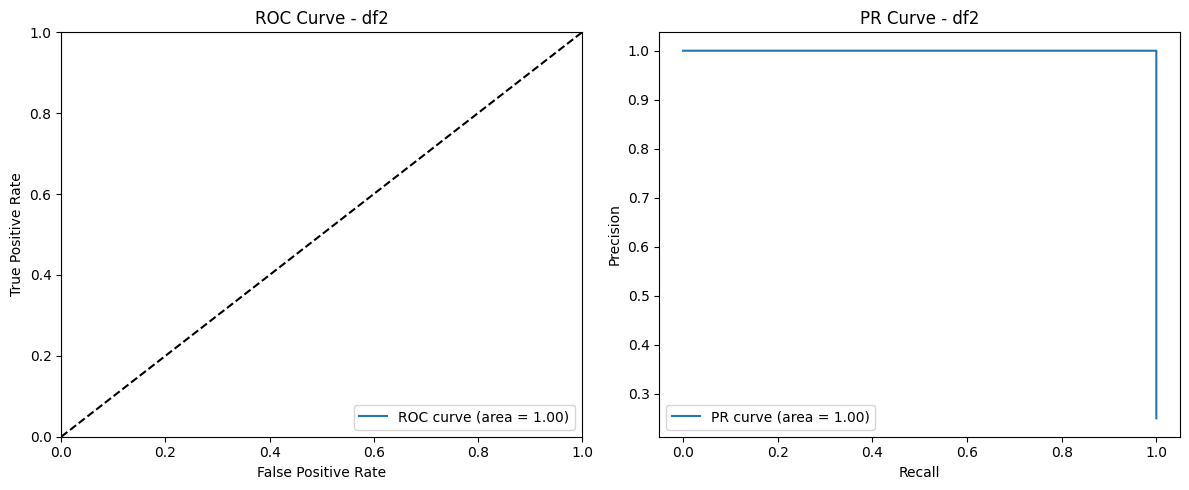

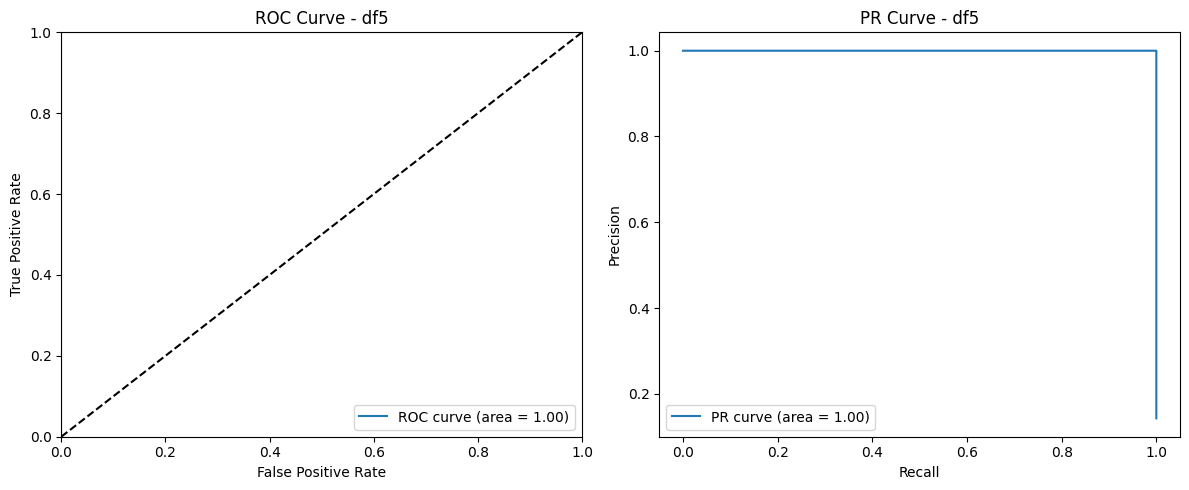

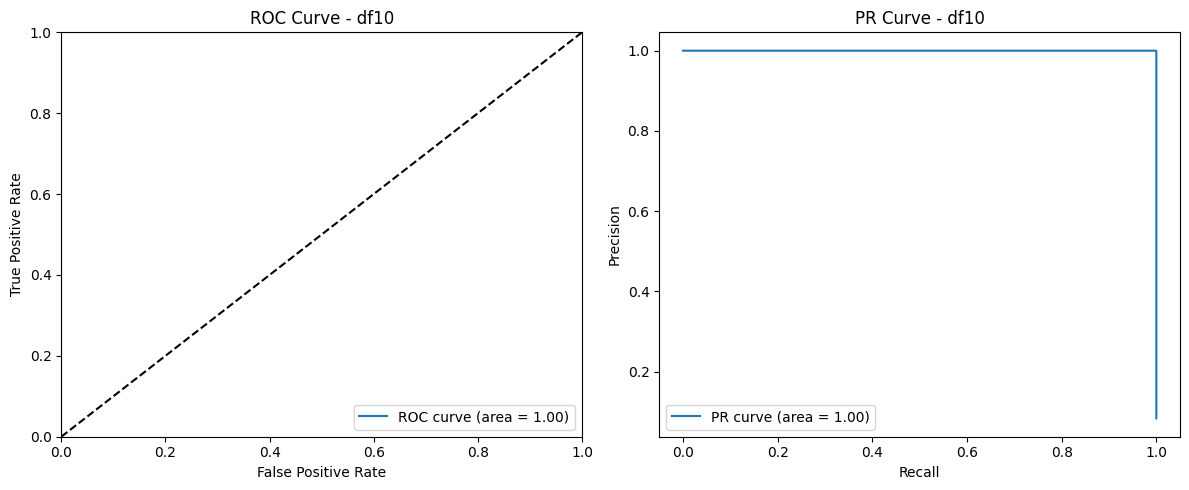

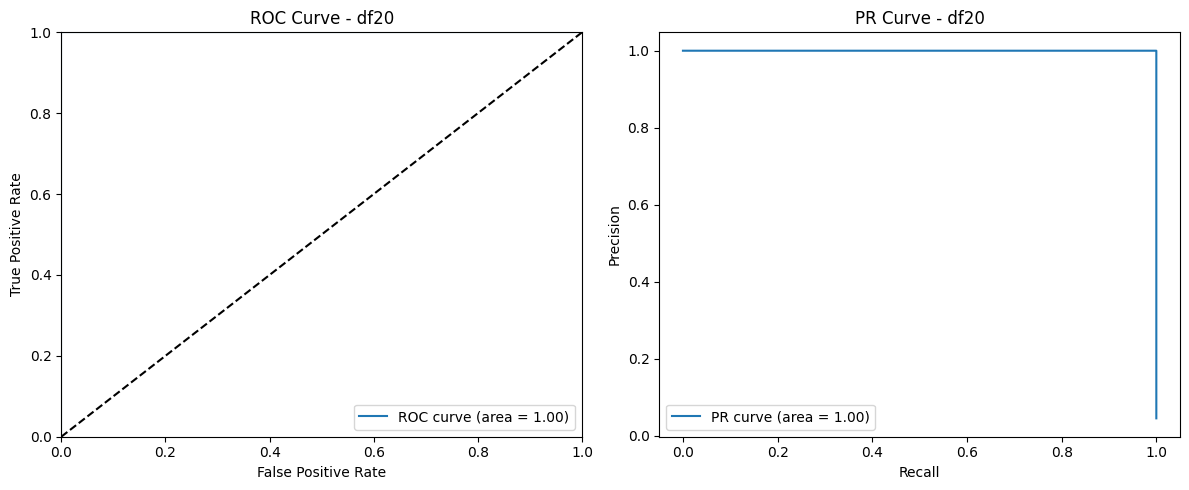

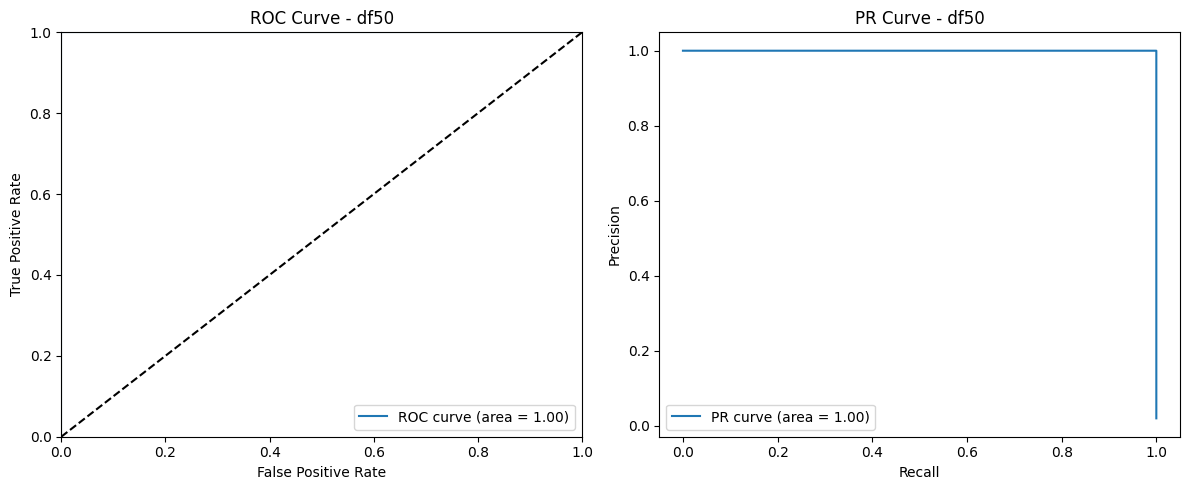

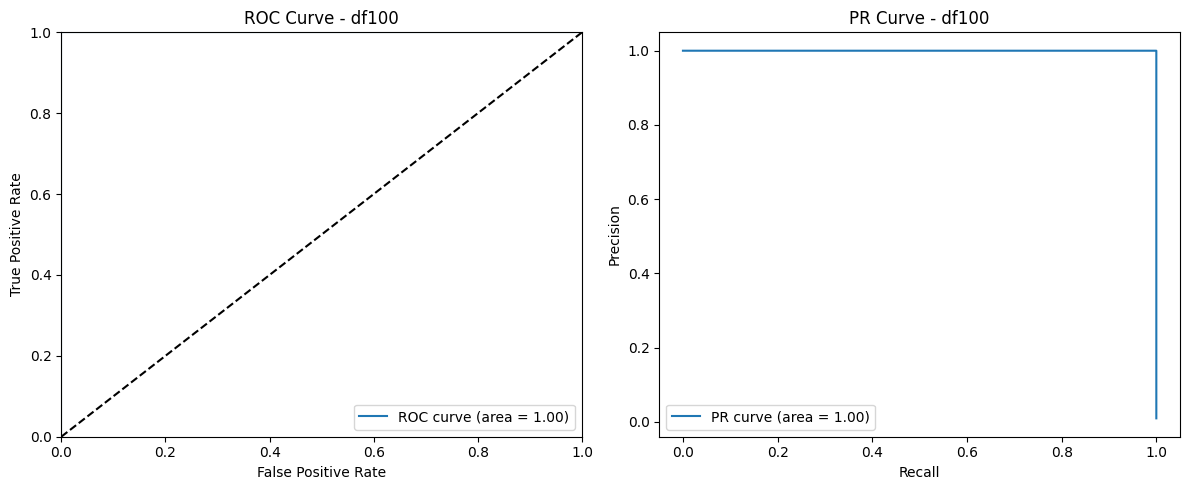

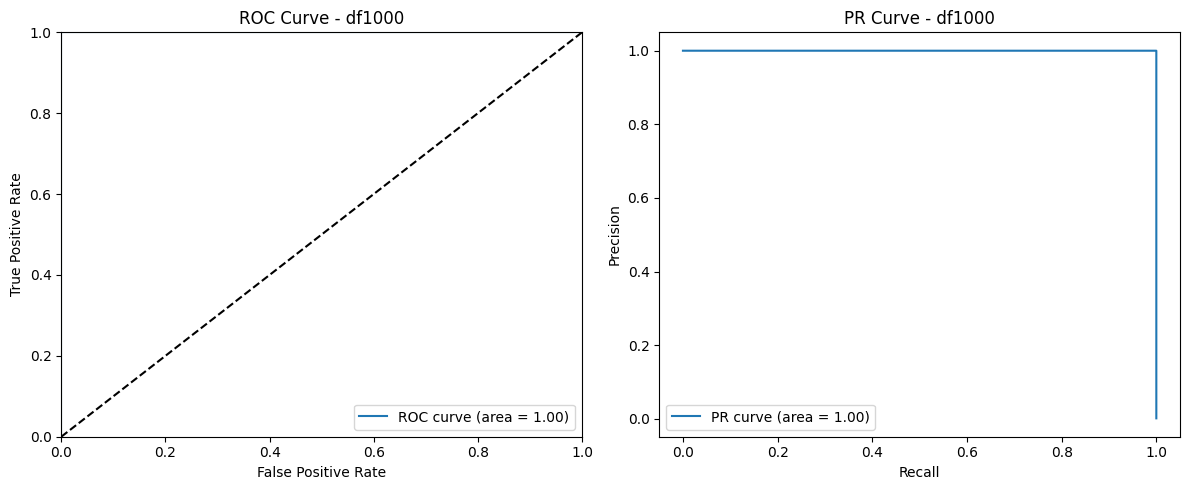

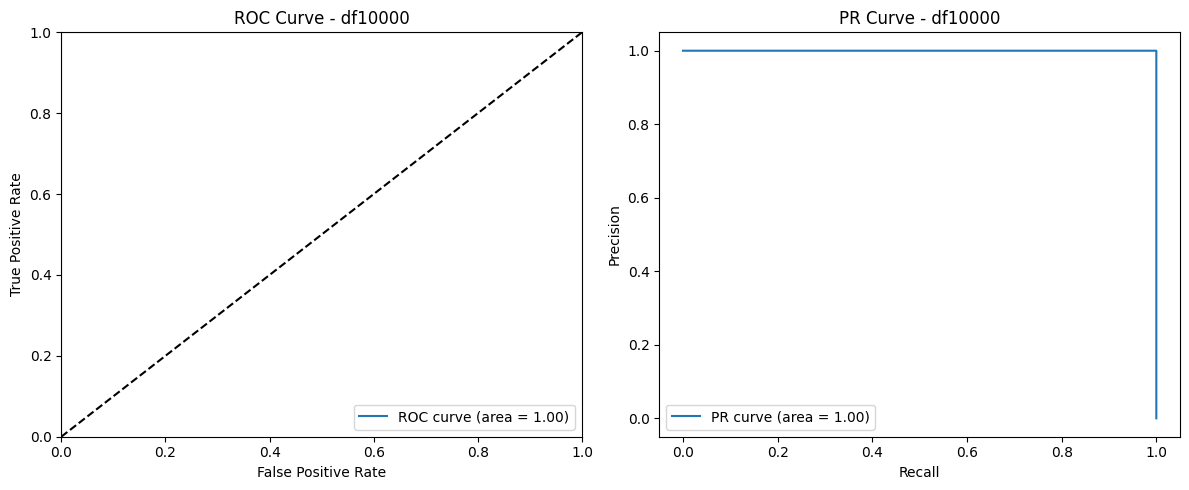

In [12]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
def plot_roc_and_pr_curves(datasets, target_class, features):
    for key, dataset in datasets.items():
        y = label_binarize(dataset['species'], classes=[0, 1, 2])
        y_target = y[:, target_class]  # Извлечение целевого класса

        X = dataset[features].values

        model = SVC(probability=True)  # Используем SVC с вероятностями
        model.fit(X, y_target)

        y_scores = model.predict_proba(X)[:, 1]

        fpr, tpr, _ = roc_curve(y_target, y_scores)
        roc_auc = auc(fpr, tpr)

        precision, recall, _ = precision_recall_curve(y_target, y_scores)
        pr_auc = auc(recall, precision)

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {key}')
        plt.legend(loc='lower right')

        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'PR Curve - {key}')
        plt.legend(loc='lower left')

        plt.tight_layout()
        plt.show()

plot_roc_and_pr_curves(duplicated_datasets, target_class=1, features=['sepal_length', 'sepal_width'])


8. В пункте 7 выбрать другой целевой класс.
- Построить ROC кривую и рассчитать метрику AUROC.
- Построить PR кривую и рассчитать метрику AUPRC.
- (*) Построить PRgain кривую и рассчитать метрику AUPRgainC

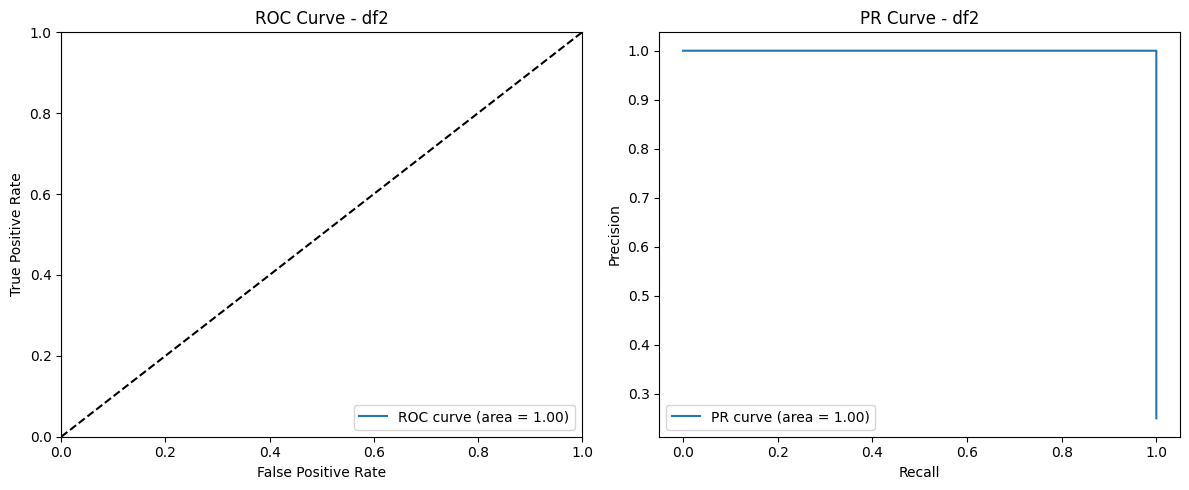

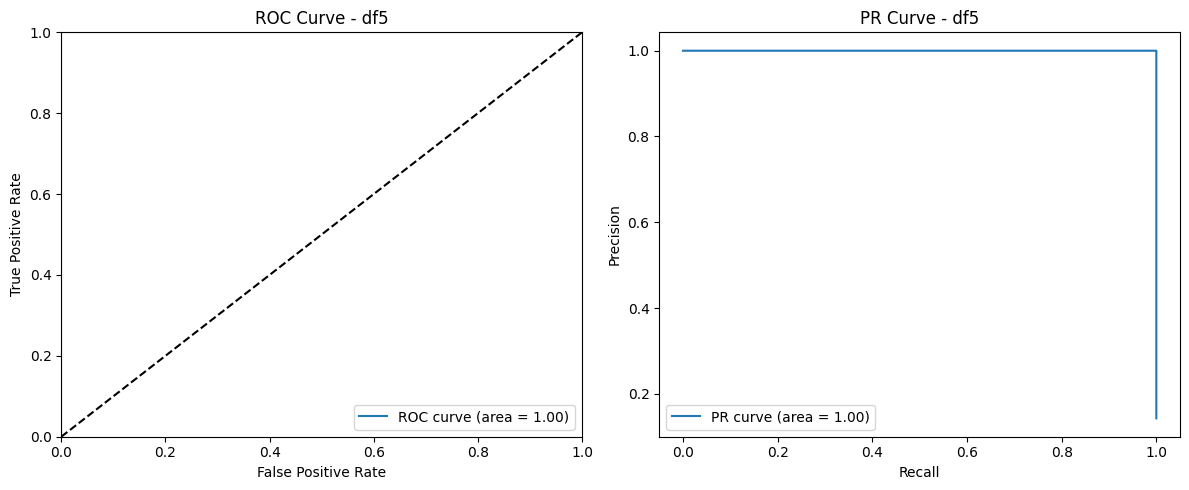

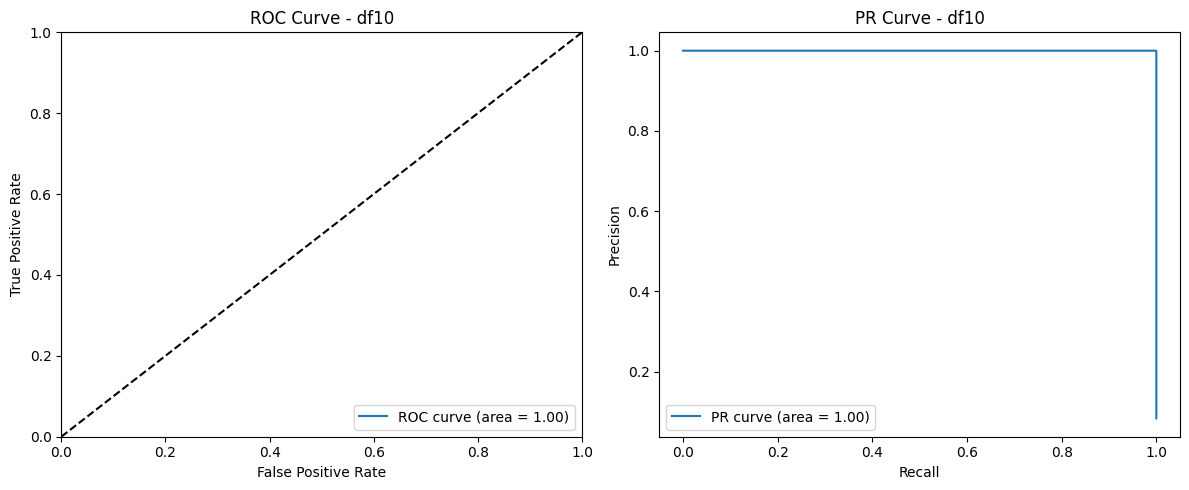

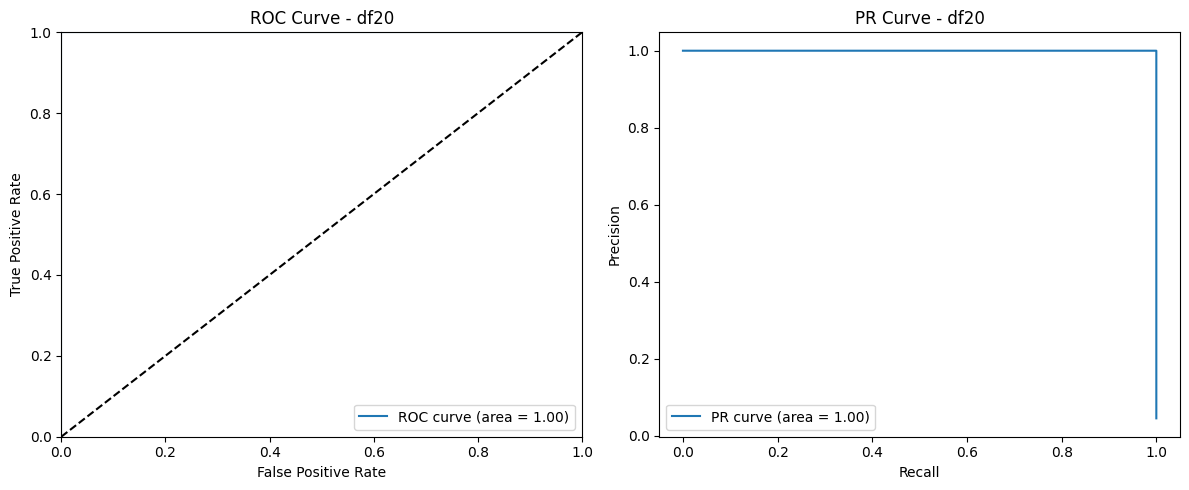

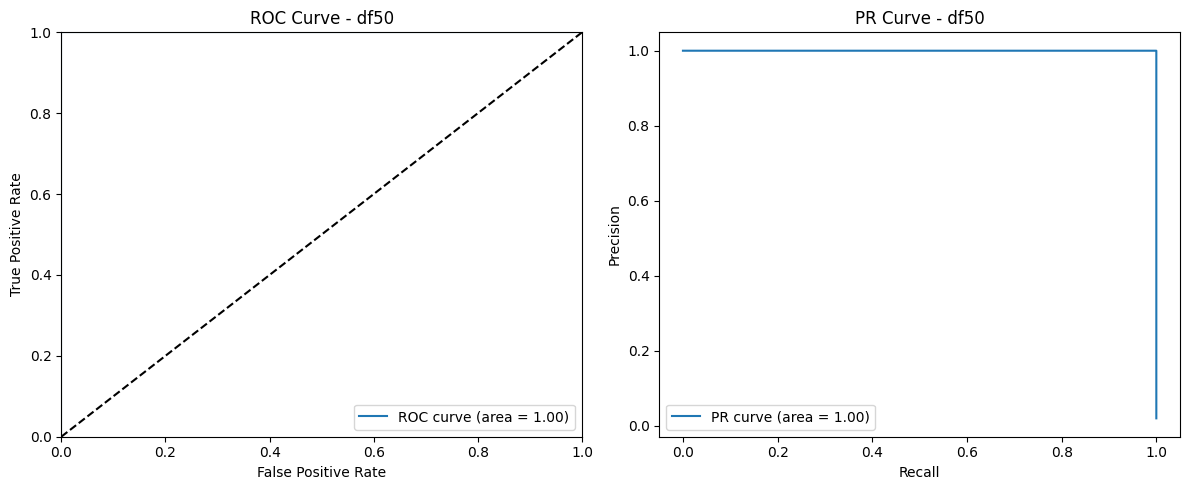

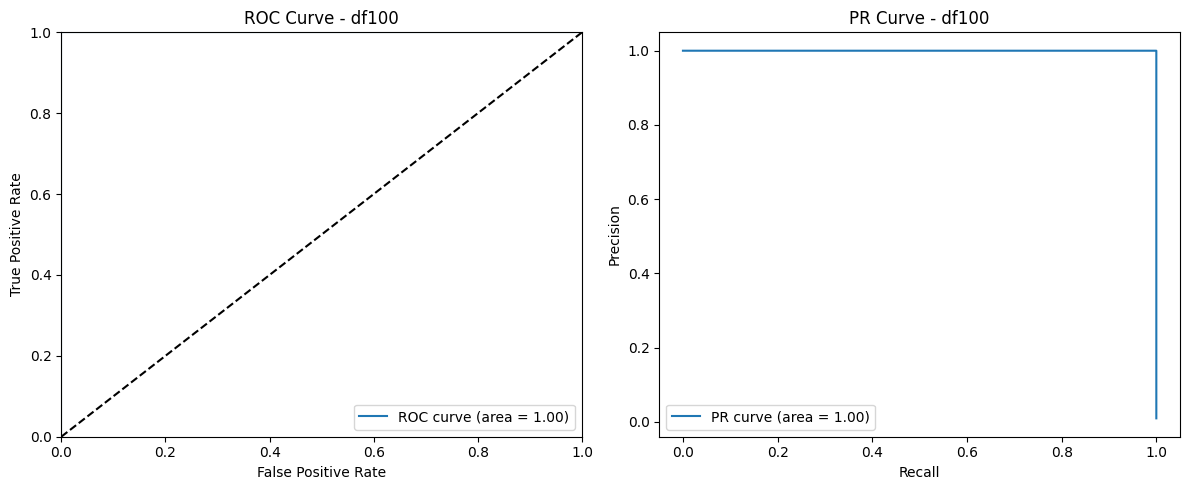

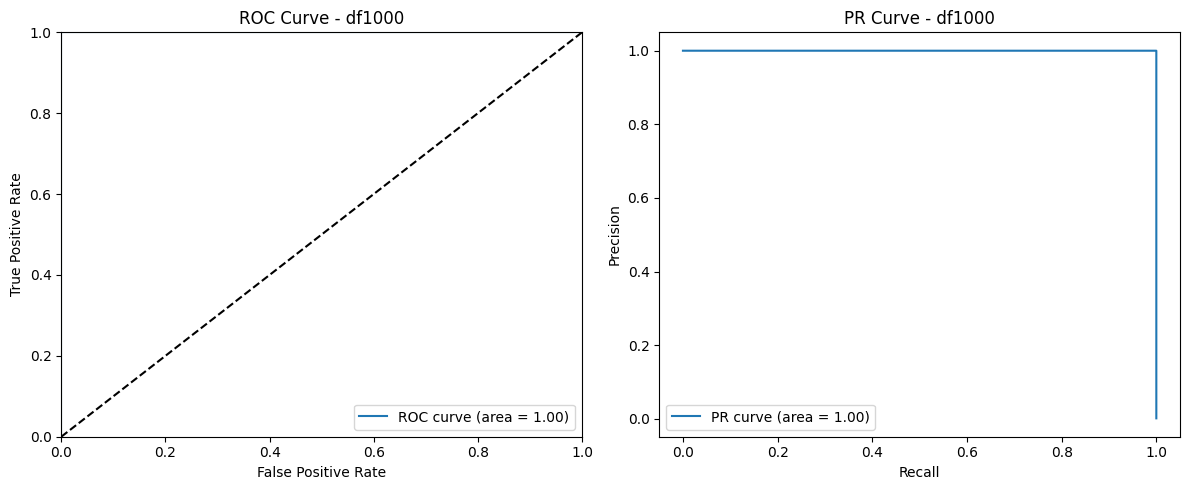

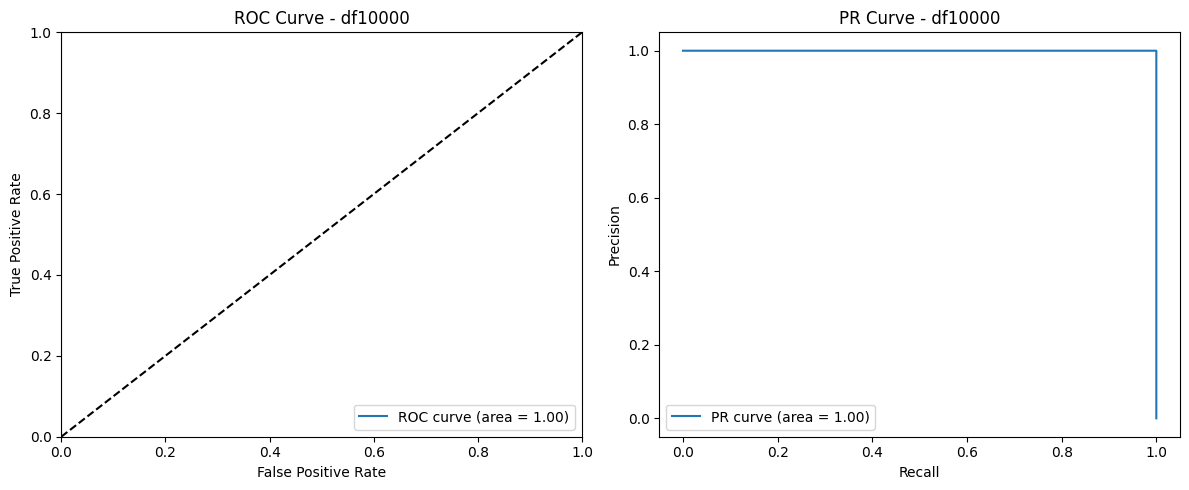

In [13]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
def plot_roc_and_pr_curves(datasets, target_class, features):

    for key, dataset in datasets.items():
        y = label_binarize(dataset['species'], classes=[0, 1, 2])
        y_target = y[:, target_class]  # Извлечение целевого класса

        X = dataset[features].values

        model = SVC(probability=True)  # Используем SVC с вероятностями
        model.fit(X, y_target)

        y_scores = model.predict_proba(X)[:, 1]

        fpr, tpr, _ = roc_curve(y_target, y_scores)
        roc_auc = auc(fpr, tpr)

        precision, recall, _ = precision_recall_curve(y_target, y_scores)
        pr_auc = auc(recall, precision)

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {key}')
        plt.legend(loc='lower right')

        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'PR Curve - {key}')
        plt.legend(loc='lower left')

        plt.tight_layout()
        plt.show()

plot_roc_and_pr_curves(duplicated_datasets, target_class=2, features=['sepal_length', 'sepal_width'])


9. Для датасета 10k на основе 3-fold, 5-fold, 10-fold, 20-fold, 50-fold, 100-fold кроссвалидации построить кривые AUROC и AUPRC c доверительными интервалами (CI95). Вместо CI95 можно взять CI90, CI80 или другой вариант доверительного интервала.

In [15]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold

def cross_validate_and_plot(datasets, target_class, features, cv_folds):
    for key, dataset in datasets.items():
        y = (dataset['species'] == target_class).astype(int)
        X = dataset[features].values

        if len(np.unique(y)) < 2:
            print(f"{key}: недостаточно классов для классификации.")
            continue

        model = LinearDiscriminantAnalysis()

        kf = StratifiedKFold(n_splits=cv_folds)
        roc_aucs = []
        pr_aucs = []

        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)

            y_scores = model.decision_function(X_test)

            if len(np.unique(y_test)) > 1:
                fpr, tpr, _ = roc_curve(y_test, y_scores)
                roc_aucs.append(auc(fpr, tpr))

            precision, recall, _ = precision_recall_curve(y_test, y_scores)
            pr_aucs.append(auc(recall, precision))

        if roc_aucs:
            mean_roc_auc = np.mean(roc_aucs)
            std_roc_auc = np.std(roc_aucs)
            print(f"{key}: Mean AUROC: {mean_roc_auc:.3f} ± {1.28 * std_roc_auc:.3f} (CI80)")
        else:
            print(f"{key}: Недостаточно данных для расчета AUROC.")

        if pr_aucs:
            mean_pr_auc = np.mean(pr_aucs)
            std_pr_auc = np.std(pr_aucs)
            print(f"{key}: Mean AUPRC: {mean_pr_auc:.3f} ± {1.28 * std_pr_auc:.3f} (CI80)\n")
        else:
            print(f"{key}: Недостаточно данных для расчета AUPRC.\n")

cross_validate_and_plot(duplicated_datasets, target_class=1, features=['sepal_length', 'sepal_width'], cv_folds=3)


df2: Mean AUROC: 1.000 ± 0.000 (CI80)
df2: Mean AUPRC: 1.000 ± 0.000 (CI80)

df5: Mean AUROC: 1.000 ± 0.000 (CI80)
df5: Mean AUPRC: 1.000 ± 0.000 (CI80)

df10: Mean AUROC: 1.000 ± 0.000 (CI80)
df10: Mean AUPRC: 1.000 ± 0.000 (CI80)

df20: Mean AUROC: 1.000 ± 0.000 (CI80)
df20: Mean AUPRC: 1.000 ± 0.000 (CI80)

df50: Mean AUROC: 1.000 ± 0.000 (CI80)
df50: Mean AUPRC: 1.000 ± 0.000 (CI80)

df100: Mean AUROC: 1.000 ± 0.000 (CI80)
df100: Mean AUPRC: 1.000 ± 0.000 (CI80)

df1000: Mean AUROC: 1.000 ± 0.000 (CI80)
df1000: Mean AUPRC: 1.000 ± 0.000 (CI80)

df10000: Mean AUROC: 1.000 ± 0.000 (CI80)
df10000: Mean AUPRC: 1.000 ± 0.000 (CI80)



In [14]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold

def cross_validate_and_plot(datasets, target_class, features, cv_folds):
    for key, dataset in datasets.items():
        y = (dataset['species'] == target_class).astype(int)
        X = dataset[features].values

        if len(np.unique(y)) < 2:
            print(f"{key}: недостаточно классов для классификации.")
            continue

        model = LinearDiscriminantAnalysis()

        kf = StratifiedKFold(n_splits=cv_folds)
        roc_aucs = []
        pr_aucs = []

        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)

            y_scores = model.decision_function(X_test)

            if len(np.unique(y_test)) > 1:
                fpr, tpr, _ = roc_curve(y_test, y_scores)
                roc_aucs.append(auc(fpr, tpr))

            precision, recall, _ = precision_recall_curve(y_test, y_scores)
            pr_aucs.append(auc(recall, precision))

        if roc_aucs:
            mean_roc_auc = np.mean(roc_aucs)
            std_roc_auc = np.std(roc_aucs)
            print(f"{key}: Mean AUROC: {mean_roc_auc:.3f} ± {1.28 * std_roc_auc:.3f} (CI80)")
        else:
            print(f"{key}: Недостаточно данных для расчета AUROC.")

        if pr_aucs:
            mean_pr_auc = np.mean(pr_aucs)
            std_pr_auc = np.std(pr_aucs)
            print(f"{key}: Mean AUPRC: {mean_pr_auc:.3f} ± {1.28 * std_pr_auc:.3f} (CI80)\n")
        else:
            print(f"{key}: Недостаточно данных для расчета AUPRC.\n")

cross_validate_and_plot(duplicated_datasets, target_class=1, features=['sepal_length', 'sepal_width'], cv_folds=5)


df2: Mean AUROC: 1.000 ± 0.000 (CI80)
df2: Mean AUPRC: 1.000 ± 0.000 (CI80)

df5: Mean AUROC: 1.000 ± 0.000 (CI80)
df5: Mean AUPRC: 1.000 ± 0.000 (CI80)

df10: Mean AUROC: 1.000 ± 0.000 (CI80)
df10: Mean AUPRC: 1.000 ± 0.000 (CI80)

df20: Mean AUROC: 1.000 ± 0.000 (CI80)
df20: Mean AUPRC: 1.000 ± 0.000 (CI80)

df50: Mean AUROC: 1.000 ± 0.000 (CI80)
df50: Mean AUPRC: 1.000 ± 0.000 (CI80)

df100: Mean AUROC: 1.000 ± 0.000 (CI80)
df100: Mean AUPRC: 1.000 ± 0.000 (CI80)

df1000: Mean AUROC: 1.000 ± 0.000 (CI80)
df1000: Mean AUPRC: 1.000 ± 0.000 (CI80)

df10000: Mean AUROC: 1.000 ± 0.000 (CI80)
df10000: Mean AUPRC: 1.000 ± 0.000 (CI80)



In [16]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold

def cross_validate_and_plot(datasets, target_class, features, cv_folds):
    for key, dataset in datasets.items():
        y = (dataset['species'] == target_class).astype(int)
        X = dataset[features].values

        if len(np.unique(y)) < 2:
            print(f"{key}: недостаточно классов для классификации.")
            continue

        model = LinearDiscriminantAnalysis()

        kf = StratifiedKFold(n_splits=cv_folds)
        roc_aucs = []
        pr_aucs = []

        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)

            y_scores = model.decision_function(X_test)

            if len(np.unique(y_test)) > 1:
                fpr, tpr, _ = roc_curve(y_test, y_scores)
                roc_aucs.append(auc(fpr, tpr))

            precision, recall, _ = precision_recall_curve(y_test, y_scores)
            pr_aucs.append(auc(recall, precision))

        if roc_aucs:
            mean_roc_auc = np.mean(roc_aucs)
            std_roc_auc = np.std(roc_aucs)
            print(f"{key}: Mean AUROC: {mean_roc_auc:.3f} ± {1.28 * std_roc_auc:.3f} (CI80)")
        else:
            print(f"{key}: Недостаточно данных для расчета AUROC.")

        if pr_aucs:
            mean_pr_auc = np.mean(pr_aucs)
            std_pr_auc = np.std(pr_aucs)
            print(f"{key}: Mean AUPRC: {mean_pr_auc:.3f} ± {1.28 * std_pr_auc:.3f} (CI80)\n")
        else:
            print(f"{key}: Недостаточно данных для расчета AUPRC.\n")

cross_validate_and_plot(duplicated_datasets, target_class=1, features=['sepal_length', 'sepal_width'], cv_folds=10)


df2: Mean AUROC: 1.000 ± 0.000 (CI80)
df2: Mean AUPRC: 1.000 ± 0.000 (CI80)

df5: Mean AUROC: 1.000 ± 0.000 (CI80)
df5: Mean AUPRC: 1.000 ± 0.000 (CI80)

df10: Mean AUROC: 1.000 ± 0.000 (CI80)
df10: Mean AUPRC: 1.000 ± 0.000 (CI80)

df20: Mean AUROC: 1.000 ± 0.000 (CI80)
df20: Mean AUPRC: 1.000 ± 0.000 (CI80)

df50: Mean AUROC: 1.000 ± 0.000 (CI80)
df50: Mean AUPRC: 1.000 ± 0.000 (CI80)

df100: Mean AUROC: 1.000 ± 0.000 (CI80)
df100: Mean AUPRC: 1.000 ± 0.000 (CI80)

df1000: Mean AUROC: 1.000 ± 0.000 (CI80)
df1000: Mean AUPRC: 1.000 ± 0.000 (CI80)

df10000: Mean AUROC: 1.000 ± 0.000 (CI80)
df10000: Mean AUPRC: 1.000 ± 0.000 (CI80)



In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold

def cross_validate_and_plot(datasets, target_class, features, cv_folds):
    for key, dataset in datasets.items():
        y = (dataset['species'] == target_class).astype(int)
        X = dataset[features].values

        if len(np.unique(y)) < 2:
            print(f"{key}: недостаточно классов для классификации.")
            continue

        model = LinearDiscriminantAnalysis()

        kf = StratifiedKFold(n_splits=cv_folds)
        roc_aucs = []
        pr_aucs = []

        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)

            y_scores = model.decision_function(X_test)

            if len(np.unique(y_test)) > 1:
                fpr, tpr, _ = roc_curve(y_test, y_scores)
                roc_aucs.append(auc(fpr, tpr))

            precision, recall, _ = precision_recall_curve(y_test, y_scores)
            pr_aucs.append(auc(recall, precision))

        if roc_aucs:
            mean_roc_auc = np.mean(roc_aucs)
            std_roc_auc = np.std(roc_aucs)
            print(f"{key}: Mean AUROC: {mean_roc_auc:.3f} ± {1.28 * std_roc_auc:.3f} (CI80)")
        else:
            print(f"{key}: Недостаточно данных для расчета AUROC.")

        if pr_aucs:
            mean_pr_auc = np.mean(pr_aucs)
            std_pr_auc = np.std(pr_aucs)
            print(f"{key}: Mean AUPRC: {mean_pr_auc:.3f} ± {1.28 * std_pr_auc:.3f} (CI80)\n")
        else:
            print(f"{key}: Недостаточно данных для расчета AUPRC.\n")

cross_validate_and_plot(duplicated_datasets, target_class=1, features=['sepal_length', 'sepal_width'], cv_folds=20)


In [17]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold

def cross_validate_and_plot(datasets, target_class, features, cv_folds):
    for key, dataset in datasets.items():
        y = (dataset['species'] == target_class).astype(int)
        X = dataset[features].values

        if len(np.unique(y)) < 2:
            print(f"{key}: недостаточно классов для классификации.")
            continue

        model = LinearDiscriminantAnalysis()

        kf = StratifiedKFold(n_splits=cv_folds)
        roc_aucs = []
        pr_aucs = []

        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)

            y_scores = model.decision_function(X_test)

            if len(np.unique(y_test)) > 1:
                fpr, tpr, _ = roc_curve(y_test, y_scores)
                roc_aucs.append(auc(fpr, tpr))

            precision, recall, _ = precision_recall_curve(y_test, y_scores)
            pr_aucs.append(auc(recall, precision))

        if roc_aucs:
            mean_roc_auc = np.mean(roc_aucs)
            std_roc_auc = np.std(roc_aucs)
            print(f"{key}: Mean AUROC: {mean_roc_auc:.3f} ± {1.28 * std_roc_auc:.3f} (CI80)")
        else:
            print(f"{key}: Недостаточно данных для расчета AUROC.")

        if pr_aucs:
            mean_pr_auc = np.mean(pr_aucs)
            std_pr_auc = np.std(pr_aucs)
            print(f"{key}: Mean AUPRC: {mean_pr_auc:.3f} ± {1.28 * std_pr_auc:.3f} (CI80)\n")
        else:
            print(f"{key}: Недостаточно данных для расчета AUPRC.\n")

cross_validate_and_plot(duplicated_datasets, target_class=1, features=['sepal_length', 'sepal_width'], cv_folds=50)


df2: Mean AUROC: 1.000 ± 0.000 (CI80)
df2: Mean AUPRC: 1.000 ± 0.000 (CI80)

df5: Mean AUROC: 1.000 ± 0.000 (CI80)
df5: Mean AUPRC: 1.000 ± 0.000 (CI80)

df10: Mean AUROC: 1.000 ± 0.000 (CI80)
df10: Mean AUPRC: 1.000 ± 0.000 (CI80)

df20: Mean AUROC: 1.000 ± 0.000 (CI80)
df20: Mean AUPRC: 1.000 ± 0.000 (CI80)

df50: Mean AUROC: 1.000 ± 0.000 (CI80)
df50: Mean AUPRC: 1.000 ± 0.000 (CI80)

df100: Mean AUROC: 1.000 ± 0.000 (CI80)
df100: Mean AUPRC: 1.000 ± 0.000 (CI80)

df1000: Mean AUROC: 1.000 ± 0.000 (CI80)
df1000: Mean AUPRC: 1.000 ± 0.000 (CI80)

df10000: Mean AUROC: 1.000 ± 0.000 (CI80)
df10000: Mean AUPRC: 1.000 ± 0.000 (CI80)



In [18]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold

def cross_validate_and_plot(datasets, target_class, features, cv_folds):
    for key, dataset in datasets.items():
        y = (dataset['species'] == target_class).astype(int)
        X = dataset[features].values

        if len(np.unique(y)) < 2:
            print(f"{key}: недостаточно классов для классификации.")
            continue

        model = LinearDiscriminantAnalysis()

        kf = StratifiedKFold(n_splits=cv_folds)
        roc_aucs = []
        pr_aucs = []

        for train_index, test_index in kf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            model.fit(X_train, y_train)

            y_scores = model.decision_function(X_test)

            if len(np.unique(y_test)) > 1:
                fpr, tpr, _ = roc_curve(y_test, y_scores)
                roc_aucs.append(auc(fpr, tpr))

            precision, recall, _ = precision_recall_curve(y_test, y_scores)
            pr_aucs.append(auc(recall, precision))

        if roc_aucs:
            mean_roc_auc = np.mean(roc_aucs)
            std_roc_auc = np.std(roc_aucs)
            print(f"{key}: Mean AUROC: {mean_roc_auc:.3f} ± {1.28 * std_roc_auc:.3f} (CI80)")
        else:
            print(f"{key}: Недостаточно данных для расчета AUROC.")

        if pr_aucs:
            mean_pr_auc = np.mean(pr_aucs)
            std_pr_auc = np.std(pr_aucs)
            print(f"{key}: Mean AUPRC: {mean_pr_auc:.3f} ± {1.28 * std_pr_auc:.3f} (CI80)\n")
        else:
            print(f"{key}: Недостаточно данных для расчета AUPRC.\n")

cross_validate_and_plot(duplicated_datasets, target_class=1, features=['sepal_length', 'sepal_width'], cv_folds=100)


df2: Mean AUROC: 1.000 ± 0.000 (CI80)
df2: Mean AUPRC: 1.000 ± 0.000 (CI80)

df5: Mean AUROC: 1.000 ± 0.000 (CI80)
df5: Mean AUPRC: 1.000 ± 0.000 (CI80)

df10: Mean AUROC: 1.000 ± 0.000 (CI80)
df10: Mean AUPRC: 1.000 ± 0.000 (CI80)

df20: Mean AUROC: 1.000 ± 0.000 (CI80)
df20: Mean AUPRC: 1.000 ± 0.000 (CI80)

df50: Mean AUROC: 1.000 ± 0.000 (CI80)
df50: Mean AUPRC: 1.000 ± 0.000 (CI80)

df100: Mean AUROC: 1.000 ± 0.000 (CI80)
df100: Mean AUPRC: 1.000 ± 0.000 (CI80)

df1000: Mean AUROC: 1.000 ± 0.000 (CI80)
df1000: Mean AUPRC: 1.000 ± 0.000 (CI80)

df10000: Mean AUROC: 1.000 ± 0.000 (CI80)
df10000: Mean AUPRC: 1.000 ± 0.000 (CI80)

